# Sales and Demand Analysis for Walmart Stores: Exploring Feature Importance and Insights.


# Detailed Problem that Walmart faces 

One of the leading retail stores in the US, Walmart, would like to predict the sales and demand accurately. There are certain events and holidays which impact sales on each day. There are sales data available for 45 stores of Walmart. The business is facing a challenge due to unforeseen demands and runs out of stock some times, due to the inappropriate machine learning algorithm. An ideal ML algorithm will predict demand accurately and ingest factors like economic conditions including CPI, Unemployment Index, etc.

Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of all, which are the Super Bowl, Labour Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data. Historical sales data for 45 Walmart stores located in different regions are available.

# Shorter and Concise Problem statement


To analyse and predict the demand for 45 Walmart Stories so that it can plan its promotional strategies and markdowns during holiday and non-holiday weeks

# Steps to solve this problem statement of Walmart 


1. Importing and reading data 
2. Data Cleaning 
3. Exploratory Data Analysis (EDA)
4. Feature Engineering 
5. Model Building and Evaluation
6. Feature Importance 
7. Model findings and recommendations 

# Details of columns or features in this dataset 

This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file Walmart_Store_sales. Within this file you will find the following fields:\

- Store - the store number
- Date - the week of sales
- Weekly_Sales - sales for the given store
- Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week
- Temperature - Temperature on the day of sale
- Fuel_Price - Cost of fuel in the region
- CPI – Prevailing consumer price index
- Unemployment - Prevailing unemployment rate


--------------------------------------------------------------------------------------------------------------------------------

- Holiday Events\
#### Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13\
#### Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13\
#### Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13\
#### Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

## Step 1: Importing and reading data 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [2]:
walmart =  pd.read_csv("Walmart.csv")

walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
walmart.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


In [4]:
walmart.shape # There are 6435 records and 8 columns/features in this dataset 

(6435, 8)

In [5]:
walmart.columns # The eight columns from this dataset are 'Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       # 'Fuel_Price', 'CPI', 'Unemployment']

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [6]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


## Step 2: Data Cleaning 

In [7]:
# Let's check if this dataset has any missing values 

walmart.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

<Axes: >

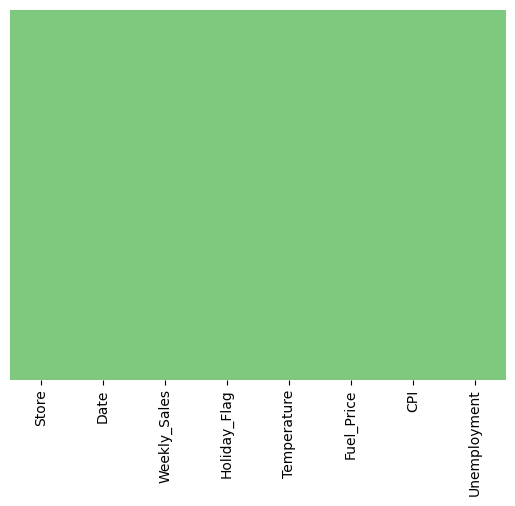

In [8]:
sns.heatmap(walmart.isnull(),  yticklabels=False, cbar=False, cmap = "Accent")

In [9]:
# Let's look at the number of unique values at each column

walmart.nunique()

Store             45
Date             143
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
dtype: int64

#### It is clear that none of the columns have any missing values in this dataset
#### So, let's proceed with the Exploratory data analysis

## Step 3 - Exploratory Data Analysis (EDA)

In [10]:
walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [11]:
walmart.Date=pd.to_datetime(walmart.Date)


In [12]:
walmart['day'] = walmart.Date.dt.weekday
walmart['month'] = walmart.Date.dt.month
walmart['year'] = walmart.Date.dt.year

In [13]:
# Let us convert days and months into categorical columns 

days = {0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5: 'Friday',6:'Saturday'}
walmart['day'] = walmart['day'].map(days)
months={1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}
walmart['month']= walmart['month'].map(months)

walmart['week'] = walmart['Date'].dt.week

walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year,week
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,Saturday,May,2010,17
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,Wednesday,December,2010,48
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,Thursday,February,2010,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,Thursday,February,2010,8
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,Sunday,May,2010,18


In [14]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   day           6435 non-null   object        
 9   month         6435 non-null   object        
 10  year          6435 non-null   int64         
 11  week          6435 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(4), object(2)
memory usage: 603.4+ KB


In [15]:
walmart.nunique().sort_values()

Holiday_Flag       2
year               3
day                7
month             12
Store             45
week              52
Date             143
Unemployment     349
Fuel_Price       892
CPI             2145
Temperature     3528
Weekly_Sales    6435
dtype: int64

In [16]:
walmart.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,week
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,2010.965035,26.000000
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,0.797019,14.511794
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,2010.000000,1.000000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,2010.000000,14.000000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,2011.000000,26.000000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,2012.000000,38.000000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,2012.000000,52.000000


In [17]:
# Checking outliers with the help of boxplot 

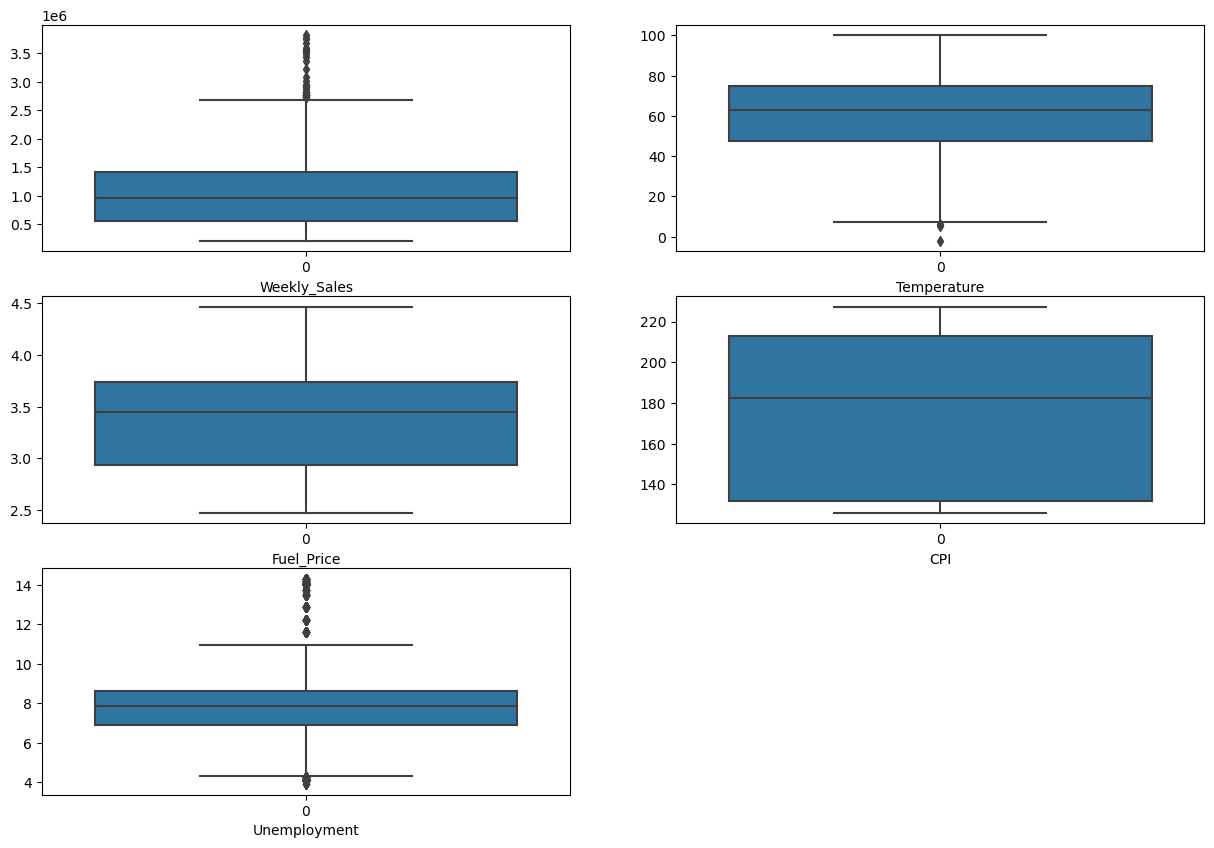

In [18]:
pno = 1
plt.figure(figsize=(15,10))
for i in ["Weekly_Sales","Temperature","Fuel_Price","CPI","Unemployment"]:
        if pno<=5:
            plt.subplot(3,2,pno);
            pno+=1
            sns.boxplot(walmart[i]);
            plt.xlabel(i);

#### Three columns have outliers. They are Weekly sales, fuel price and unemployment

In [19]:
# Let us treat the outliers now 

def outlier_treatment():
    l = ["Weekly_Sales","Temperature","Unemployment"]
    for i in l:
        x = np.quantile(walmart[i],[0.25,0.75])
        iqr = x[1]-x[0]
        uw = x[1]+1.5*iqr
        lw = x[0]-1.5*iqr
        walmart[i]  = np.where(walmart[i]>uw,uw,(np.where(walmart[i]<lw,lw,walmart[i])))
        
outlier_treatment()

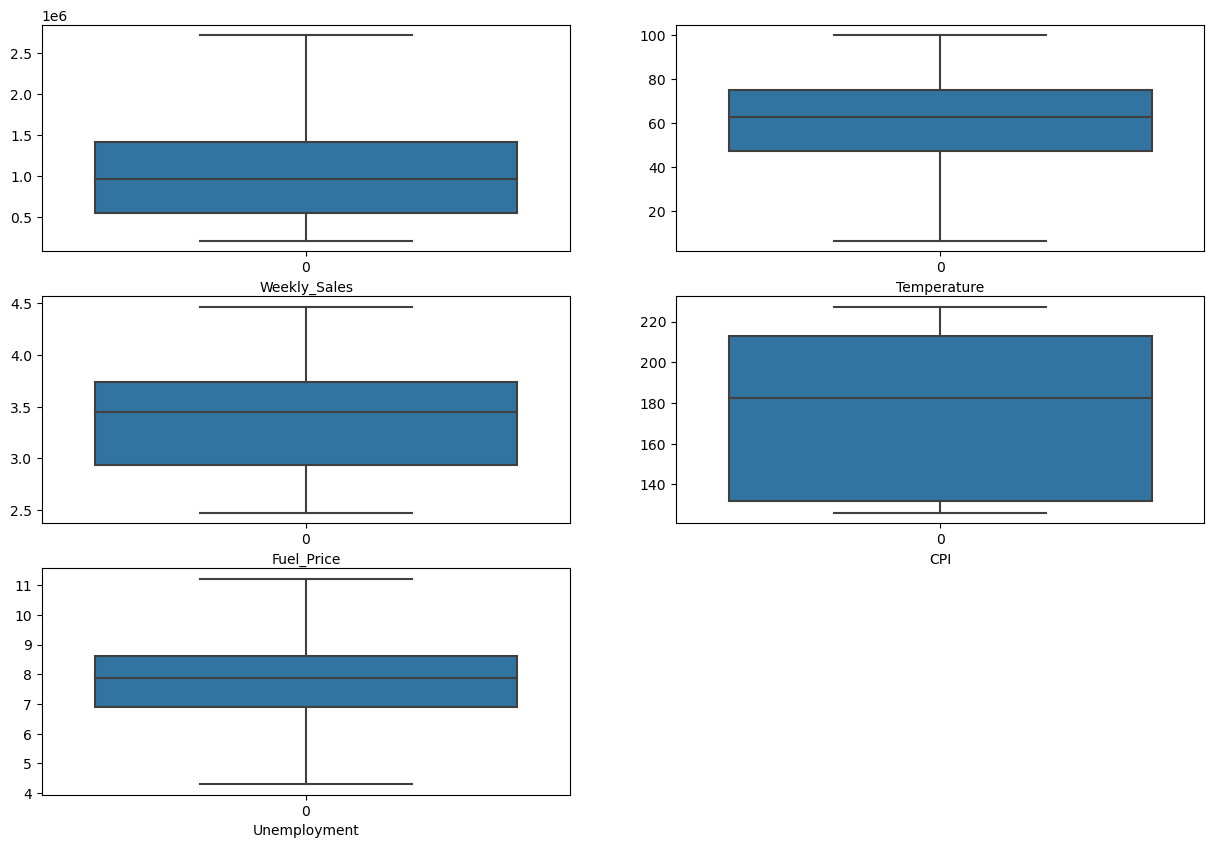

In [20]:
# Now let us again check if the column has any outliers 

pno = 1
plt.figure(figsize=(15,10))
for i in ["Weekly_Sales","Temperature","Fuel_Price","CPI","Unemployment"]:
        if pno<=5:
            plt.subplot(3,2,pno);
            pno+=1
            sns.boxplot(walmart[i]);
            plt.xlabel(i);

#### Now the outliers have been removed from this table

In [21]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   day           6435 non-null   object        
 9   month         6435 non-null   object        
 10  year          6435 non-null   int64         
 11  week          6435 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(4), object(2)
memory usage: 603.4+ KB


In [22]:
walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year,week
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,Saturday,May,2010,17
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,Wednesday,December,2010,48
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,Thursday,February,2010,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,Thursday,February,2010,8
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,Sunday,May,2010,18


### 1. Were there higher number of transactions happening in holiday weeks or Non-holiday weeks? 

In [23]:
walmart["Holiday_Flag"].value_counts()

0    5985
1     450
Name: Holiday_Flag, dtype: int64

<Axes: >

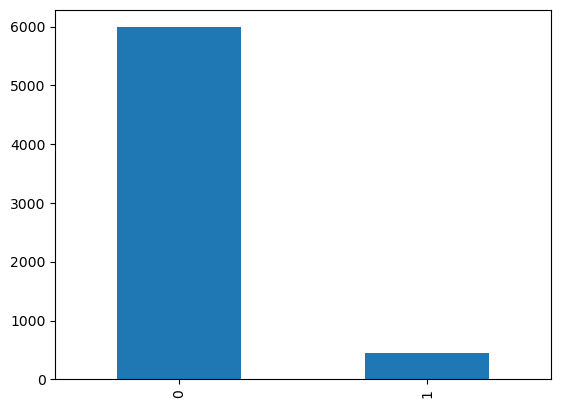

In [24]:
walmart["Holiday_Flag"].value_counts().plot(kind = "bar")

#### There were higher number of non -holiday weeks than the holiday weeks 

### 2. Which year had the most number of transactions? 

In [25]:
walmart["year"].value_counts()

2011    2340
2010    2160
2012    1935
Name: year, dtype: int64

<Axes: >

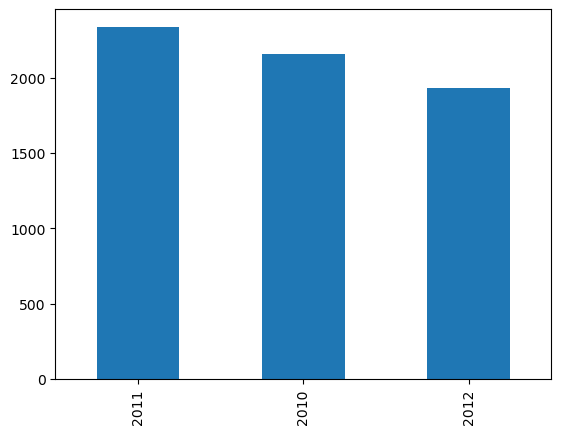

In [26]:
walmart["year"].value_counts().plot(kind = "bar")

#### The year 2011 had the most number of transactions with 2340 and 2012 had the least number of transactions

### 3. Which month had the highest number of transactions? 

In [27]:
walmart["month"].value_counts()

April        630
May          585
September    585
July         585
October      585
March        540
June         540
August       540
December     495
February     495
January      450
November     405
Name: month, dtype: int64

<Axes: >

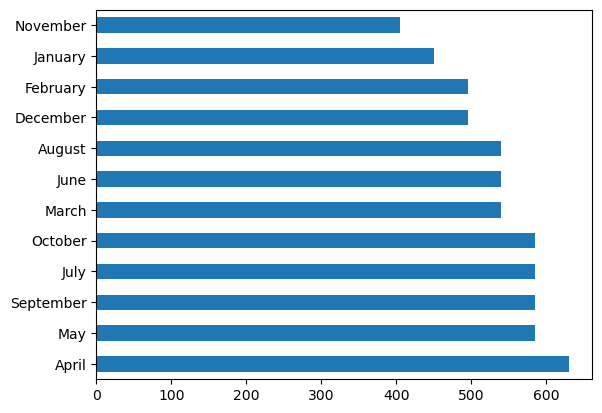

In [28]:
walmart["month"].value_counts().plot(kind = "barh")

#### The month of April had the highest number of transactions among all the walmart stores

### 4. Which day had the highest number of transactions? 

In [29]:
walmart["day"].value_counts()

Thursday     4320
Sunday        495
Wednesday     450
Saturday      405
Monday        405
Friday        270
Tuesday        90
Name: day, dtype: int64

<Axes: >

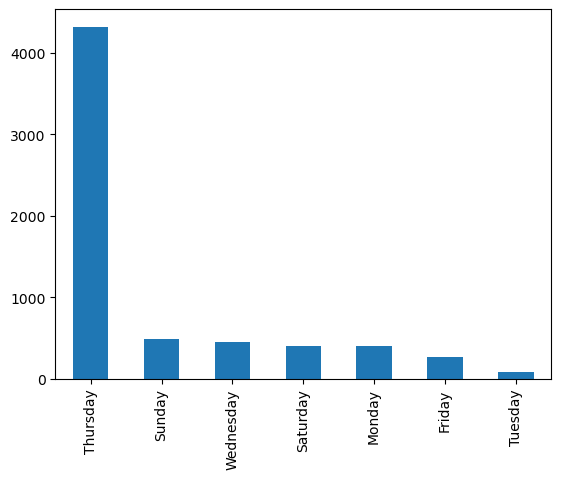

In [30]:
walmart["day"].value_counts().plot(kind = "bar")

#### Thursday had the highest number of transactions compared to any other day in the week

### 5. Which week had the highest number of transactions among the Walmart stores? 

In [31]:
walmart["week"].value_counts()

17    180
41    180
19    180
37    180
28    180
1     180
15    180
42    135
38    135
43    135
50    135
40    135
13    135
10    135
33    135
32    135
23    135
30    135
29    135
34    135
36    135
7     135
24    135
44    135
21    135
8     135
20    135
16    135
25    135
5     135
12    135
11    135
3      90
4      90
22     90
31     90
26     90
9      90
6      90
39     90
2      90
46     90
52     90
51     90
47     90
49     90
18     90
35     90
27     90
48     90
14     90
45     90
Name: week, dtype: int64

<Figure size 3000x3000 with 0 Axes>

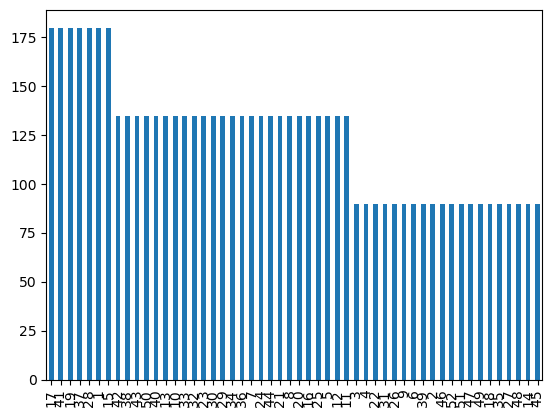

<Figure size 3000x3000 with 0 Axes>

In [32]:
walmart["week"].value_counts().plot(kind = "bar")

plt.figure(figsize = (30,30))

#### The 17th, 41st, 19th, 37th, 28th, 1st and 15th - All these weeks had the highest number of transactions (190)

#### All these weeks had the lowest number of transactions (90)

- 4th week     
- 22nd week   
- 31st week     
- 26th week  
- 9th week      
- 6th week      
- 39th week      
- 2nd week      
- 46th week      
- 52th week      
- 51st week      
- 47th week      
- 49th week    
- 18th week      
- 35th week      
- 27th week      
- 48th week      
- 14th week     
- 45th week      

### 6. Which store had the highest number of transactions among the walmart stores?

In [33]:
walmart["Store"].value_counts()

1     143
24    143
26    143
27    143
28    143
29    143
30    143
31    143
32    143
33    143
34    143
35    143
36    143
37    143
38    143
39    143
40    143
41    143
42    143
43    143
44    143
25    143
23    143
2     143
22    143
3     143
4     143
5     143
6     143
7     143
8     143
9     143
10    143
11    143
12    143
13    143
14    143
15    143
16    143
17    143
18    143
19    143
20    143
21    143
45    143
Name: Store, dtype: int64

<Axes: >

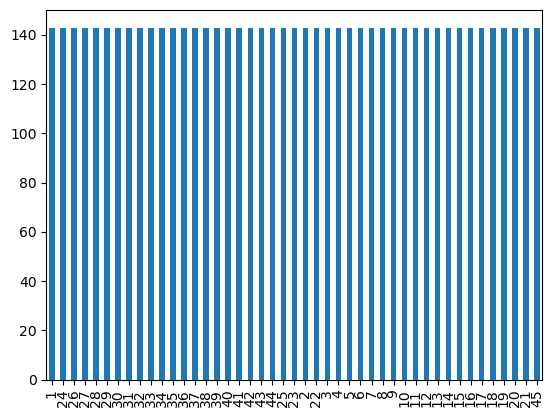

In [34]:
walmart["Store"].value_counts().plot(kind = "bar")

#### All 45 stores had an equal number of transactions occuring in them 143. 

### 7. Which year had the highest sales? 

In [35]:
walmart.groupby("year")["Weekly_Sales"].sum().sort_values(ascending = False)

year
2011    2.442656e+09
2010    2.281974e+09
2012    2.000133e+09
Name: Weekly_Sales, dtype: float64

<Axes: xlabel='year'>

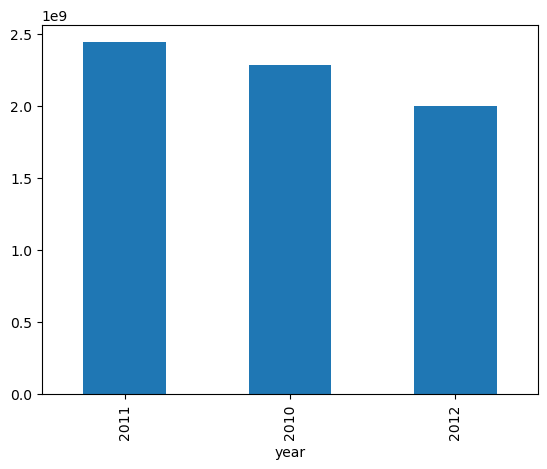

In [36]:
walmart.groupby("year")["Weekly_Sales"].sum().sort_values(ascending = False).plot(kind = "bar")

Text(0.5, 1.0, 'Annual Sales')

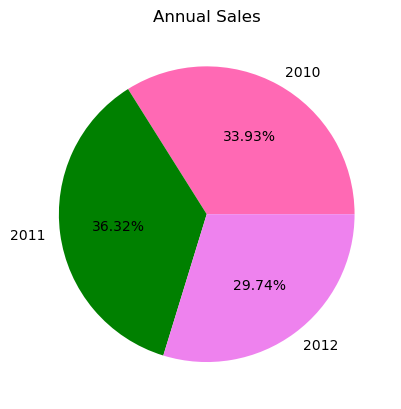

In [37]:
plt.pie(walmart.groupby('year')['Weekly_Sales'].sum(),labels=walmart['year'].unique(),
        normalize=True,autopct='%1.2f%%',colors=['hotpink','green','violet'])
plt.title('Annual Sales')

#### The year 2011 had the highest Sales of 2.44 billion US dollars compared to 2010 with 2.28 US billion dollars and 2012 with 2 billion US dollars

#### Similarly, 2011 contributes to highest sales at 36.32% that is a tad bit higher than 2010 sales that's 33.93%

### 8. Which month had the highest Sales in all the years of 2010, 2011, and 2012? 

In [38]:
walmart.groupby("month")["Weekly_Sales"].sum().sort_values(ascending = False)

month
April        6.453239e+08
May          6.056966e+08
October      6.028871e+08
July         5.933139e+08
September    5.905323e+08
December     5.881230e+08
June         5.750180e+08
August       5.642317e+08
March        5.534864e+08
February     5.220257e+08
November     4.576982e+08
January      4.264263e+08
Name: Weekly_Sales, dtype: float64

<Axes: xlabel='month'>

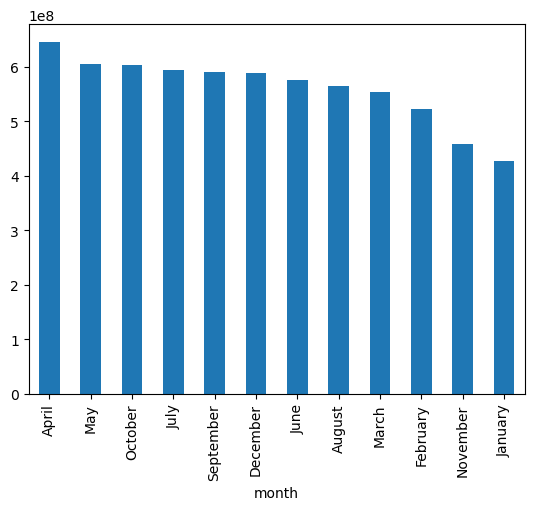

In [39]:
walmart.groupby("month")["Weekly_Sales"].sum().sort_values(ascending = False).plot(kind = "bar")

In [40]:
df3 = walmart.groupby('month')['Weekly_Sales'].sum().reset_index()

df3

,month,Weekly_Sales
0,April,6.453239e+08
1,August,5.642317e+08
2,December,5.881230e+08
3,February,5.220257e+08
4,January,4.264263e+08
5,July,5.933139e+08
6,June,5.750180e+08
7,March,5.534864e+08
8,May,6.056966e+08
9,November,4.576982e+08


([<matplotlib.patches.Wedge at 0x1f02e256560>,
 [Text(0.572939814261659, 0.17815714757992632, 'April'),
  Text(0.388480365468709, 0.45725595200642083, 'August'),
  Text(0.09909191344232197, 0.5917607562945851, 'December'),
  Text(-0.20726670105473471, 0.5630635085262472, 'February'),
  Text(-0.428653583812137, 0.41982866158113985, 'January'),
  Text(-0.5734481719803087, 0.1765140052586258, 'July'),
  Text(-0.5817609377101057, -0.14681352578920787, 'June'),
  Text(-0.4289044149041403, -0.4195724048072479, 'March'),
  Text(-0.1512678710128148, -0.5806186624620763, 'May'),
  Text(0.14374059406069353, -0.582527803301335, 'November'),
  Text(0.40341574553517356, -0.44413481765596813, 'October'),
  Text(0.5773119515122125, -0.16343472899344494, 'September')],
 [Text(1.193624613045123, 0.3711607241248465, '9.60%'),
  Text(0.8093340947264771, 0.9526165666800435, '8.39%'),
  Text(0.2064414863381708, 1.2328349089470523, '8.75%'),
  Text(-0.43180562719736404, 1.1730489760963483, '7.76%'),
  Text(

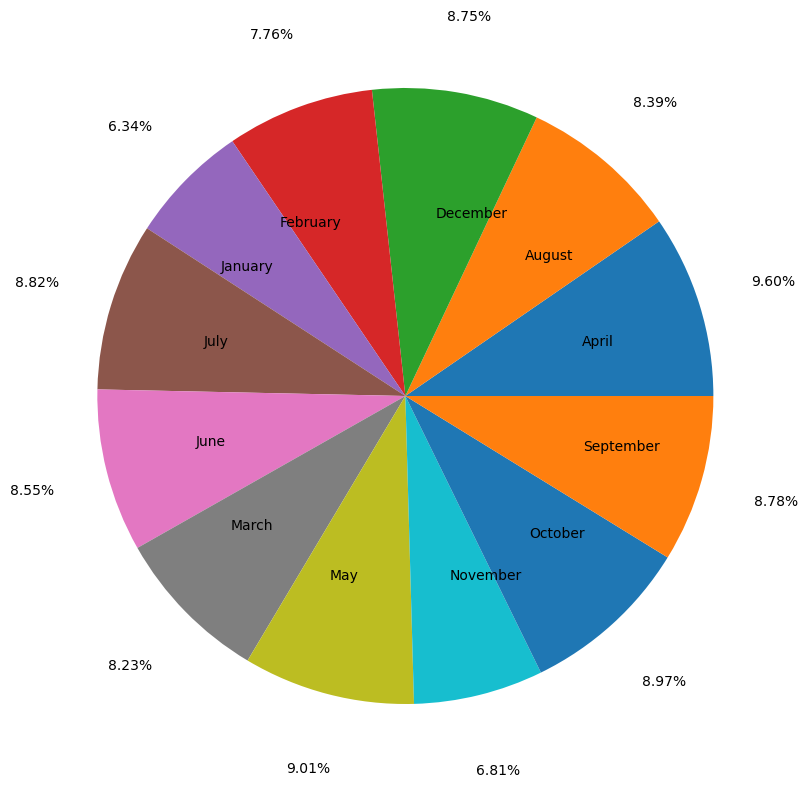

In [41]:
plt.figure(figsize=(10,10))
plt.pie(df3['Weekly_Sales'],labels=df3['month'],normalize=True,autopct='%1.2f%%', pctdistance=1.25, labeldistance=.6)

#### Among all the three years, the month of April had the highest Sales for Walmart with 645 million US dollars

#### April has 9.6 percent Sales compared to other months which is the highest among all month sales



### 9. Which day among all the years had the highest sales for Walmart? 

In [42]:
walmart.groupby("day")["Weekly_Sales"].sum().sort_values(ascending = False)


day
Thursday     4.473833e+09
Sunday       5.390133e+08
Wednesday    4.766244e+08
Monday       4.334757e+08
Saturday     4.266091e+08
Friday       2.824947e+08
Tuesday      9.271282e+07
Name: Weekly_Sales, dtype: float64

<Axes: xlabel='day'>

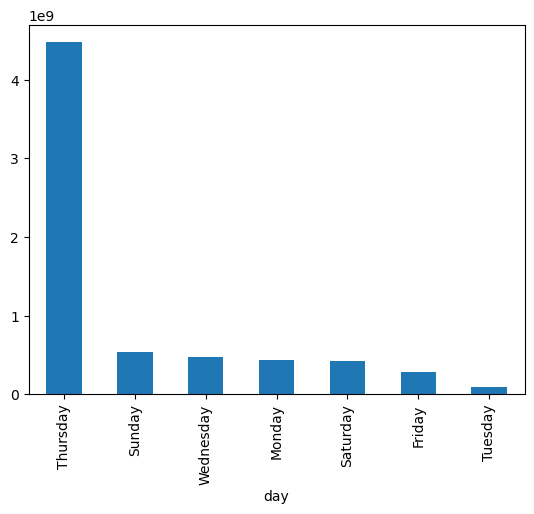

In [43]:
walmart.groupby("day")["Weekly_Sales"].sum().sort_values(ascending = False).plot(kind = "bar")

In [44]:
df2 = walmart.groupby("day")["Weekly_Sales"].sum().reset_index()

df2

,day,Weekly_Sales
0,Friday,2.824947e+08
1,Monday,4.334757e+08
2,Saturday,4.266091e+08
3,Sunday,5.390133e+08
4,Thursday,4.473833e+09
5,Tuesday,9.271282e+07
6,Wednesday,4.766244e+08


([<matplotlib.patches.Wedge at 0x1f02e233220>,
 [Text(0.5947825636806602, 0.07895379624477487, 'Friday'),
  Text(0.535902057933369, 0.2698313997717463, 'Monday'),
  Text(0.3876957790851649, 0.45792137194014765, 'Saturday'),
  Text(0.14927592972485482, 0.5811339749186759, 'Sunday'),
  Text(-0.5208077768783068, -0.2979249226618609, 'Thursday'),
  Text(0.5297833452901384, -0.28165512076507676, 'Tuesday'),
  Text(0.5851876117342988, -0.1324970153350921, 'Wednesday')],
 [Text(1.2391303410013754, 0.16448707550994768, '4.20%'),
  Text(1.1164626206945187, 0.5621487495244716, '6.45%'),
  Text(0.8076995397607601, 0.9540028582086411, '6.34%'),
  Text(0.31099152026011423, 1.2106957810805747, '8.02%'),
  Text(-1.0850162018298057, -0.6206769222122102, '66.53%'),
  Text(1.1037153026877884, -0.58678150159391, '1.38%'),
  Text(1.219140857779789, -0.2760354486147752, '7.09%')])

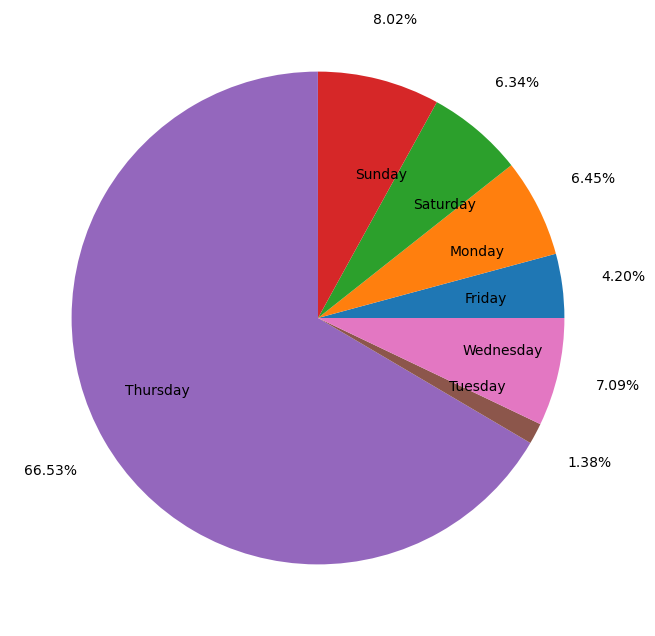

In [45]:
plt.figure(figsize=(10,8))
plt.pie(df2['Weekly_Sales'],labels= df2['day'],autopct='%1.2f%%', normalize=True, pctdistance=1.25, labeldistance=.6)

#### Thursday had the highest sales in a week among all years in Walmart with 4.47 billion. This is much higher sales from all 45 stores compared to other days. Also, Thursday has 66.53% of sales, that's highest compared to any day in the week

### 10. Which week had the highest sales? Holiday week or the non-holiday week? 

In [46]:
walmart.groupby("Holiday_Flag")["Weekly_Sales"].sum().sort_values(ascending = False)

Holiday_Flag
0    6.220935e+09
1    5.038284e+08
Name: Weekly_Sales, dtype: float64

<Axes: xlabel='Holiday_Flag'>

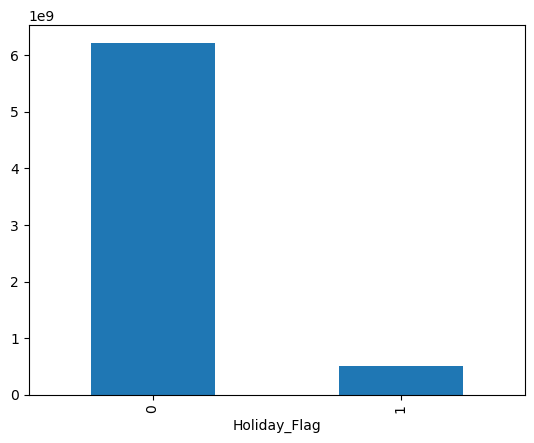

In [47]:
walmart.groupby("Holiday_Flag")["Weekly_Sales"].sum().sort_values(ascending = False).plot(kind = "bar")

([<matplotlib.patches.Wedge at 0x1f02e749990>,
 [Text(-0.2565256729373791, -1.0696703132853715, 'Non Special Holiday Week'),
  Text(0.32648725196795214, 1.3613985729030331, 'Special Holiday Week')],
 [Text(-0.1399230943294795, -0.5834565345192936, '92.51%'),
  Text(0.2098846619793978, 0.8751847968662354, '7.49%')])

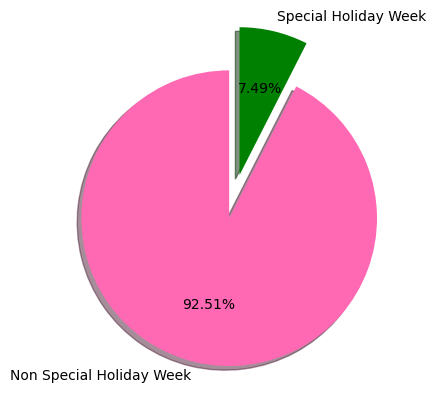

In [48]:
df4 = walmart.groupby('Holiday_Flag')['Weekly_Sales'].sum().reset_index()
plt.pie(df4['Weekly_Sales'],labels= ['Non Special Holiday Week','Special Holiday Week'],
        normalize=True,autopct='%1.2f%%',startangle=90,explode=[0,0.3],shadow=True,colors=['hotpink','green'])

#### Non holiday weeks had the highest sales of Walmart compared to holiday sales with 6.220 billion US dollars

#### Holiday weeks had the lower sales compared to non-holiday sales with 503 million US dollars

#### Similarly, non-holiday week contribute to 92.51% of Walmart sales compated to 7.49% of its special holiday week sales

### 11. Which Store has the highest and lowest sales among Walmart? 

In [49]:
walmart.groupby("Store")["Weekly_Sales"].sum().sort_values(ascending = False)

Store
20    2.990663e+08
4     2.973575e+08
14    2.870091e+08
13    2.845247e+08
2     2.741628e+08
10    2.692807e+08
27    2.534795e+08
6     2.237489e+08
1     2.224028e+08
39    2.074455e+08
19    2.066349e+08
31    1.996139e+08
23    1.987367e+08
24    1.940160e+08
11    1.939628e+08
28    1.892637e+08
41    1.813419e+08
32    1.668192e+08
18    1.551147e+08
22    1.470756e+08
12    1.442872e+08
26    1.434164e+08
34    1.382498e+08
40    1.378703e+08
35    1.315207e+08
8     1.299512e+08
17    1.277821e+08
45    1.123953e+08
21    1.081179e+08
25    1.010612e+08
43    9.056544e+07
15    8.913368e+07
7     8.159828e+07
42    7.956575e+07
9     7.778922e+07
29    7.714155e+07
16    7.425243e+07
37    7.420274e+07
30    6.271689e+07
3     5.758674e+07
38    5.515963e+07
36    5.341221e+07
5     4.547569e+07
44    4.329309e+07
33    3.716022e+07
Name: Weekly_Sales, dtype: float64

<Figure size 4000x1400 with 0 Axes>

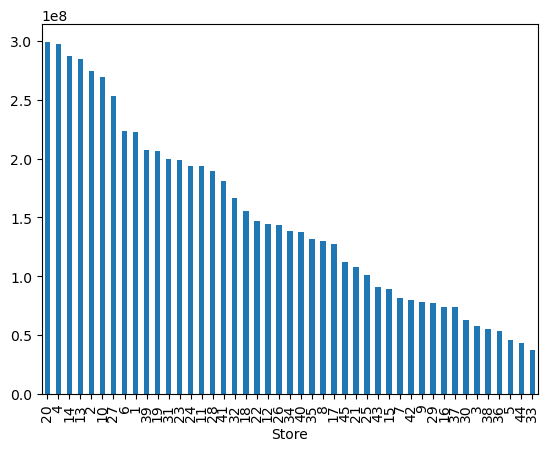

<Figure size 4000x1400 with 0 Axes>

In [50]:
walmart.groupby("Store")["Weekly_Sales"].sum().sort_values(ascending = False).plot(kind = "bar")

plt.figure(figsize=(40, 14))

#### The Store 20 is showing the highest sales among the 45 walmart stores with 299 million US dollars

#### The Store 4 is closer to Store 20 in its sales with 297 million US dollars

#### The Store 33 performed least in sales with 37 million US dollars

### 12. Which store performed well and performed least during the holiday week? 

In [51]:
holiday_sales = walmart[walmart["Holiday_Flag"] ==1]

holiday_sales

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year,week
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,Wednesday,December,2010,48
31,1,2010-10-09,1507460.69,1,78.69,2.565,211.495190,7.787,Friday,October,2010,40
42,1,2010-11-26,1955624.11,1,64.52,2.735,211.748433,7.838,Thursday,November,2010,47
47,1,2010-12-31,1367320.01,1,48.43,2.943,211.404932,7.838,Thursday,December,2010,52
53,1,2011-11-02,1649614.93,1,36.39,3.022,212.936705,7.742,Tuesday,November,2011,44
...,...,...,...,...,...,...,...,...,...,...,...,...
6375,45,2011-09-09,746129.56,1,71.48,3.738,186.673738,8.625,Thursday,September,2011,36
6386,45,2011-11-25,1170672.94,1,48.71,3.492,188.350400,8.523,Thursday,November,2011,47
6391,45,2011-12-30,869403.63,1,37.79,3.389,189.062016,8.523,Thursday,December,2011,52
6397,45,2012-10-02,803657.12,1,37.00,3.640,189.707605,8.424,Monday,October,2012,40


In [52]:
holiday_sales.groupby("Store")["Weekly_Sales"].sum().sort_values(ascending = False)

Store
20    2.221323e+07
4     2.207760e+07
14    2.100449e+07
13    2.094061e+07
2     2.079267e+07
10    2.068816e+07
27    1.892299e+07
6     1.680908e+07
1     1.665748e+07
19    1.577047e+07
39    1.551127e+07
31    1.500026e+07
28    1.478245e+07
24    1.475098e+07
23    1.462542e+07
11    1.448394e+07
41    1.334948e+07
32    1.203784e+07
18    1.169422e+07
12    1.138140e+07
22    1.084875e+07
35    1.074348e+07
26    1.072047e+07
34    1.041978e+07
40    1.008034e+07
17    9.797970e+06
8     9.753309e+06
45    8.362937e+06
21    8.264913e+06
25    7.396768e+06
15    7.064060e+06
7     6.724003e+06
43    6.359463e+06
29    6.069579e+06
9     5.889508e+06
42    5.676942e+06
16    5.667336e+06
37    5.075250e+06
3     4.378110e+06
30    4.368593e+06
38    3.815099e+06
36    3.676406e+06
5     3.595016e+06
44    2.960356e+06
33    2.625945e+06
Name: Weekly_Sales, dtype: float64

<Axes: xlabel='Store'>

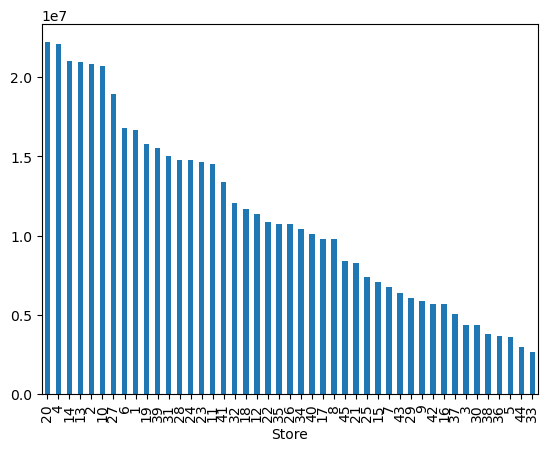

In [53]:
holiday_sales.groupby("Store")["Weekly_Sales"].sum().sort_values(ascending = False).plot(kind = "bar")

#### Store 20 showed the peak sales performance during the holiday weeks among walmart stores with 22.2 million US dollars

#### Store 33 performed the worst among all stores with 2.6 million US dollars

### 13. Which store performed well and performed least during the non-holiday week among the walmart stores? 

In [54]:
non_holiday_sales = walmart[walmart["Holiday_Flag"]==0]

In [55]:
non_holiday_sales.groupby("Store")["Weekly_Sales"].sum().sort_values(ascending = False)

Store
20    2.768531e+08
4     2.752799e+08
14    2.660046e+08
13    2.635841e+08
2     2.533701e+08
10    2.485926e+08
27    2.345565e+08
6     2.069398e+08
1     2.057453e+08
39    1.919343e+08
19    1.908644e+08
31    1.846136e+08
23    1.841113e+08
11    1.794788e+08
24    1.792650e+08
28    1.744812e+08
41    1.679925e+08
32    1.547814e+08
18    1.434205e+08
22    1.362269e+08
12    1.329058e+08
26    1.326959e+08
34    1.278300e+08
40    1.277900e+08
35    1.207772e+08
8     1.201979e+08
17    1.179842e+08
45    1.040324e+08
21    9.985297e+07
25    9.366441e+07
43    8.420597e+07
15    8.206962e+07
7     7.487427e+07
42    7.388881e+07
9     7.189971e+07
29    7.107198e+07
37    6.912749e+07
16    6.858509e+07
30    5.834829e+07
3     5.320862e+07
38    5.134453e+07
36    4.973581e+07
5     4.188067e+07
44    4.033273e+07
33    3.453428e+07
Name: Weekly_Sales, dtype: float64

<Axes: xlabel='Store'>

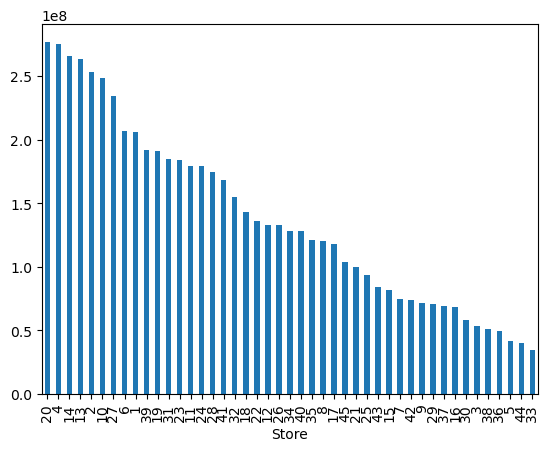

In [56]:
non_holiday_sales.groupby("Store")["Weekly_Sales"].sum().sort_values(ascending = False).plot(kind = "bar")

#### Store 20 has the highest sales even during the non-holiday weeks with 276 million US dollars

#### Store 4 has the second highest sales that's closer to Store 20 sales with 275 million US dollars

#### Store 33 has the lowest non-holiday week sales with 34 million US dollars

### 14. Which week had the highest and least sales for Walmart? 

In [57]:
walmart.groupby(["week"])["Weekly_Sales"].sum().sort_values(ascending= False)

week
41    1.905628e+08
37    1.866619e+08
28    1.861896e+08
15    1.854418e+08
19    1.841248e+08
1     1.815590e+08
17    1.807027e+08
50    1.675980e+08
23    1.529603e+08
51    1.474136e+08
7     1.471902e+08
5     1.462024e+08
10    1.445892e+08
24    1.434817e+08
40    1.433135e+08
36    1.421432e+08
33    1.413328e+08
32    1.412186e+08
21    1.409434e+08
34    1.407740e+08
25    1.401614e+08
44    1.397901e+08
16    1.384837e+08
13    1.384066e+08
11    1.367628e+08
29    1.362228e+08
20    1.359906e+08
43    1.350028e+08
42    1.340080e+08
8     1.338659e+08
30    1.324108e+08
12    1.320040e+08
47    1.309435e+08
38    1.284312e+08
14    9.731274e+07
27    9.571493e+07
45    9.540010e+07
18    9.488694e+07
9     9.485760e+07
6     9.476718e+07
35    9.452493e+07
48    9.426207e+07
31    9.374673e+07
49    9.237437e+07
22    9.181738e+07
46    9.156456e+07
26    8.937290e+07
52    8.647498e+07
39    8.593073e+07
3     8.273564e+07
2     8.269676e+07
4     7.943483e+07
Name: W

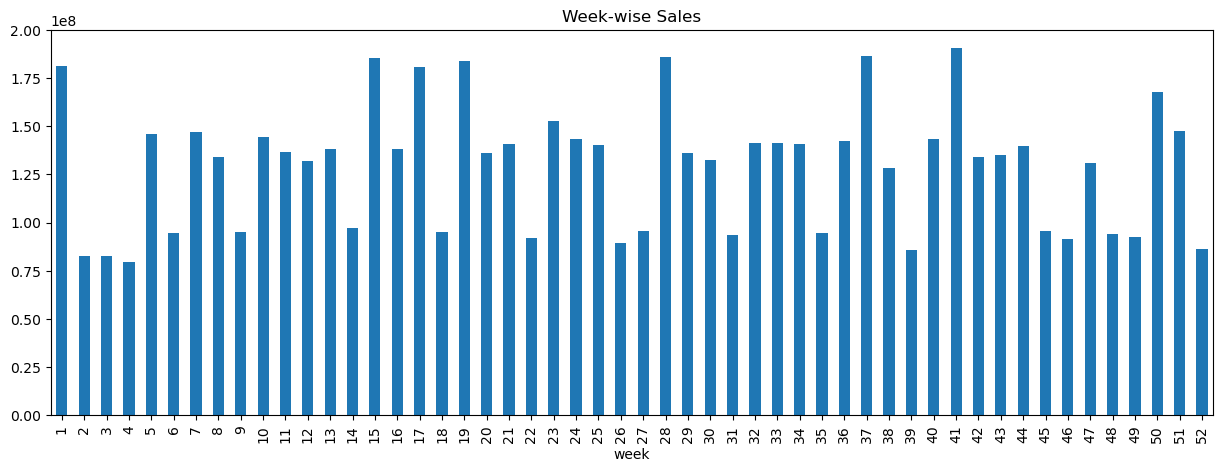

In [58]:
plt.figure(figsize=(15,5))

walmart.groupby(['week'])['Weekly_Sales'].sum().plot(kind='bar')
plt.title('Week-wise Sales')

plt.show()

#### 41st week had the highest weekly sales for Walmart and stands at 190 million US dollars. They fall in the first or second week of October like after October 7th. And 4th week in a year has the least sales for Walmart. 

### 15. How is the yearly sales of Walmart and what is its trend? 

In [59]:
df5 = walmart.copy()

<Figure size 1500x1200 with 0 Axes>

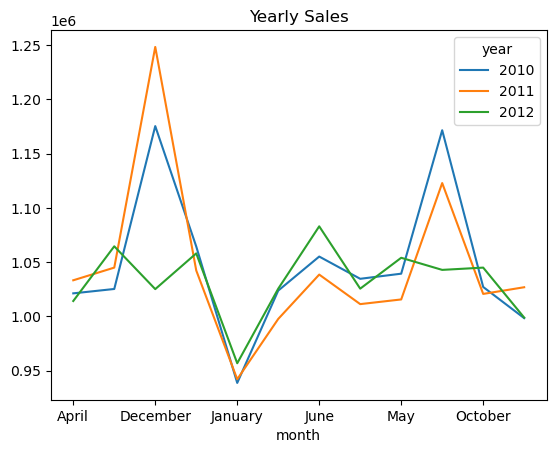

In [60]:
plt.figure(figsize=(15,12))
monthly_sales = pd.pivot_table(df5, index = "month", columns = "year", values = "Weekly_Sales")
monthly_sales.plot()
plt.title('Yearly Sales')
plt.show()

#### From this line chart, it's evident that the sales peaks up during June, december, and September and falls during the month of January



### 16. Is there a correlation between Consumer Price Index and Sales? 

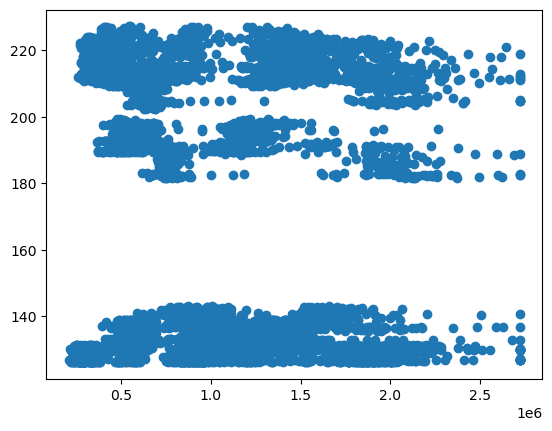

In [61]:
plt.scatter(x = walmart["Weekly_Sales"], y = walmart["CPI"])

plt.show()

#### We couldn't find any significant correlation between Consumer Price Index and Weekly Sales

In [62]:
walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year,week
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,Saturday,May,2010,17
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,Wednesday,December,2010,48
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,Thursday,February,2010,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,Thursday,February,2010,8
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,Sunday,May,2010,18


### 17. Is there a significant correlation between the Fuel Price and Weekly Sales?

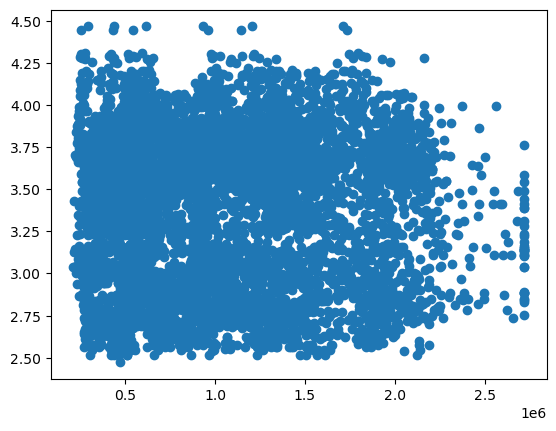

In [63]:
plt.scatter(x = walmart["Weekly_Sales"], y = walmart["Fuel_Price"])

plt.show()

#### There is no significant correlation between fuel price and weekly sales 

### 18. Is there a significant correlation between Unemployment and Weekly Sales?

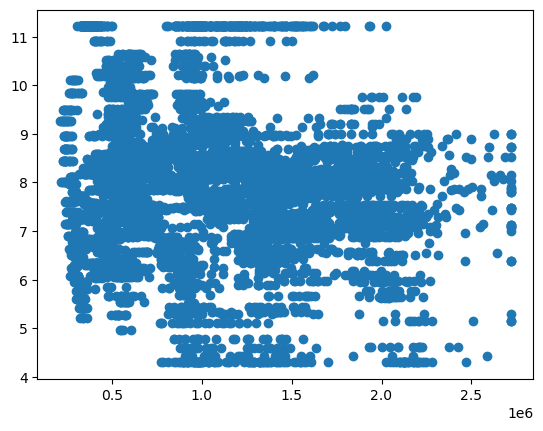

In [64]:
plt.scatter(x = walmart["Weekly_Sales"], y = walmart["Unemployment"])

plt.show()

#### There is no significant correlation between unemployment and weekly sales 

### 19. Is there a significant correlation between CPI and Unemployment? 

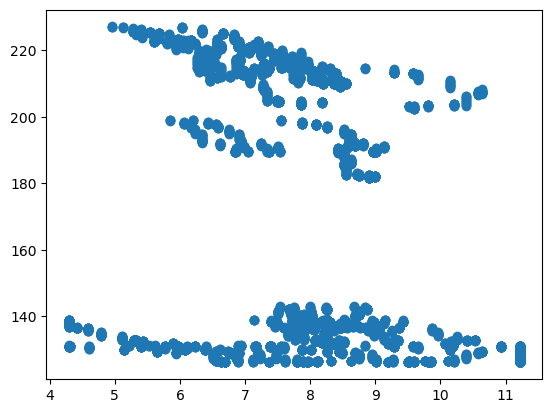

In [65]:
plt.scatter(x = walmart["Unemployment"], y = walmart["CPI"])

plt.show()

#### There is no significant correlation between unemplyoment and CPI

### 20. Is there a significant correlation between CPI and fuel price?

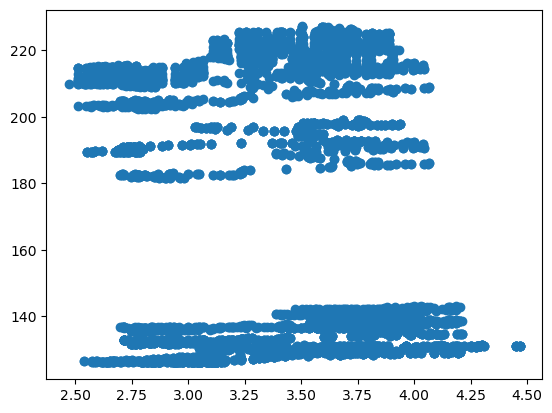

In [66]:
plt.scatter(x = walmart["Fuel_Price"], y = walmart["CPI"])

plt.show()

#### There is no significant correlation between CPI and fuel price 

### 21. Is there a significant correlation between unemployment and fuel price ?

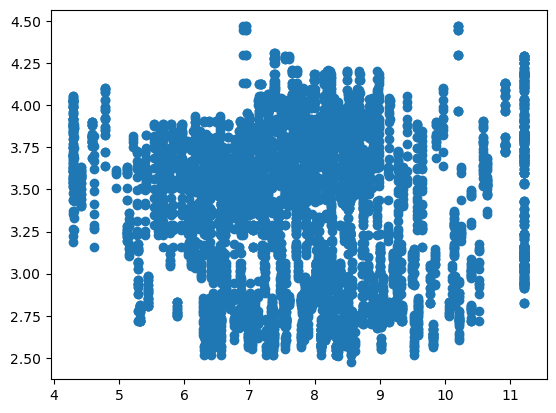

In [67]:
plt.scatter(x = walmart["Unemployment"], y = walmart["Fuel_Price"])

plt.show()

#### There is no significant correlation between unemployment and fuel price

### 22. What is the correlation between all numerical elements ?

In [68]:
walmart.corr()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,week
Store,1.000000e+00,-0.336559,-4.386841e-16,-0.022749,0.060023,-0.209492,0.255964,3.474318e-12,1.038488e-15
Weekly_Sales,-3.365589e-01,1.000000,3.670284e-02,-0.060808,0.010998,-0.072627,-0.108662,-1.634436e-02,6.108660e-02
Holiday_Flag,-4.386841e-16,0.036703,1.000000e+00,-0.155149,-0.078347,-0.002162,0.011204,-5.678257e-02,3.288032e-01
Temperature,-2.274937e-02,-0.060808,-1.551494e-01,1.000000,0.144962,0.176960,0.088315,6.428798e-02,7.313296e-02
Fuel_Price,6.002295e-02,0.010998,-7.834652e-02,0.144962,1.000000,-0.170642,-0.053428,7.794703e-01,-4.193804e-02
CPI,-2.094919e-01,-0.072627,-2.162091e-03,0.176960,-0.170642,1.000000,-0.278542,7.479573e-02,2.782979e-03
Unemployment,2.559643e-01,-0.108662,1.120376e-02,0.088315,-0.053428,-0.278542,1.000000,-2.526376e-01,-6.786673e-03
year,3.474318e-12,-0.016344,-5.678257e-02,0.064288,0.779470,0.074796,-0.252638,1.000000e+00,-1.269874e-01
week,1.038488e-15,0.061087,3.288032e-01,0.073133,-0.041938,0.002783,-0.006787,-1.269874e-01,1.000000e+00


<Axes: >

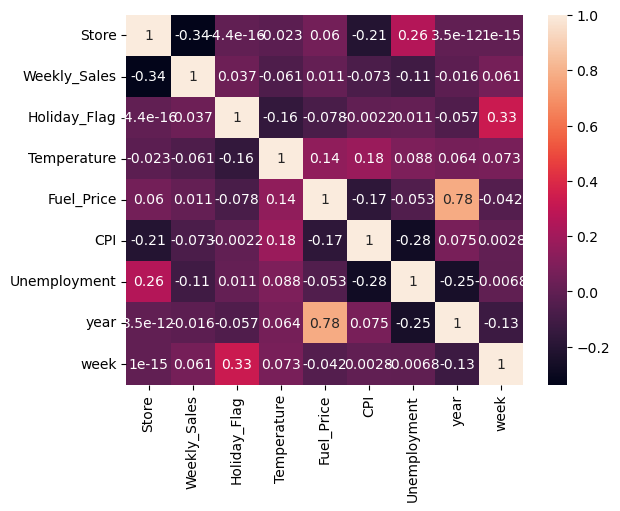

In [69]:
sns.heatmap(walmart.corr(), annot=True)

#### Some findings from the Correlation of different variables 

1. We can see that store and unemployment have some amount of correlation of 0.26
2. Temperature and fuel price have only 0.14 correlation 
3. Whereas, temperature and CPI has a lesser correlation of 0.18
4. So, there is lesser possibility of multicollinearity from this above correlation 
5. We don't take the year and fuel price into concern as year is a constant variable with only three unique values

### 23. How are numerical columns distributed in this dataset?

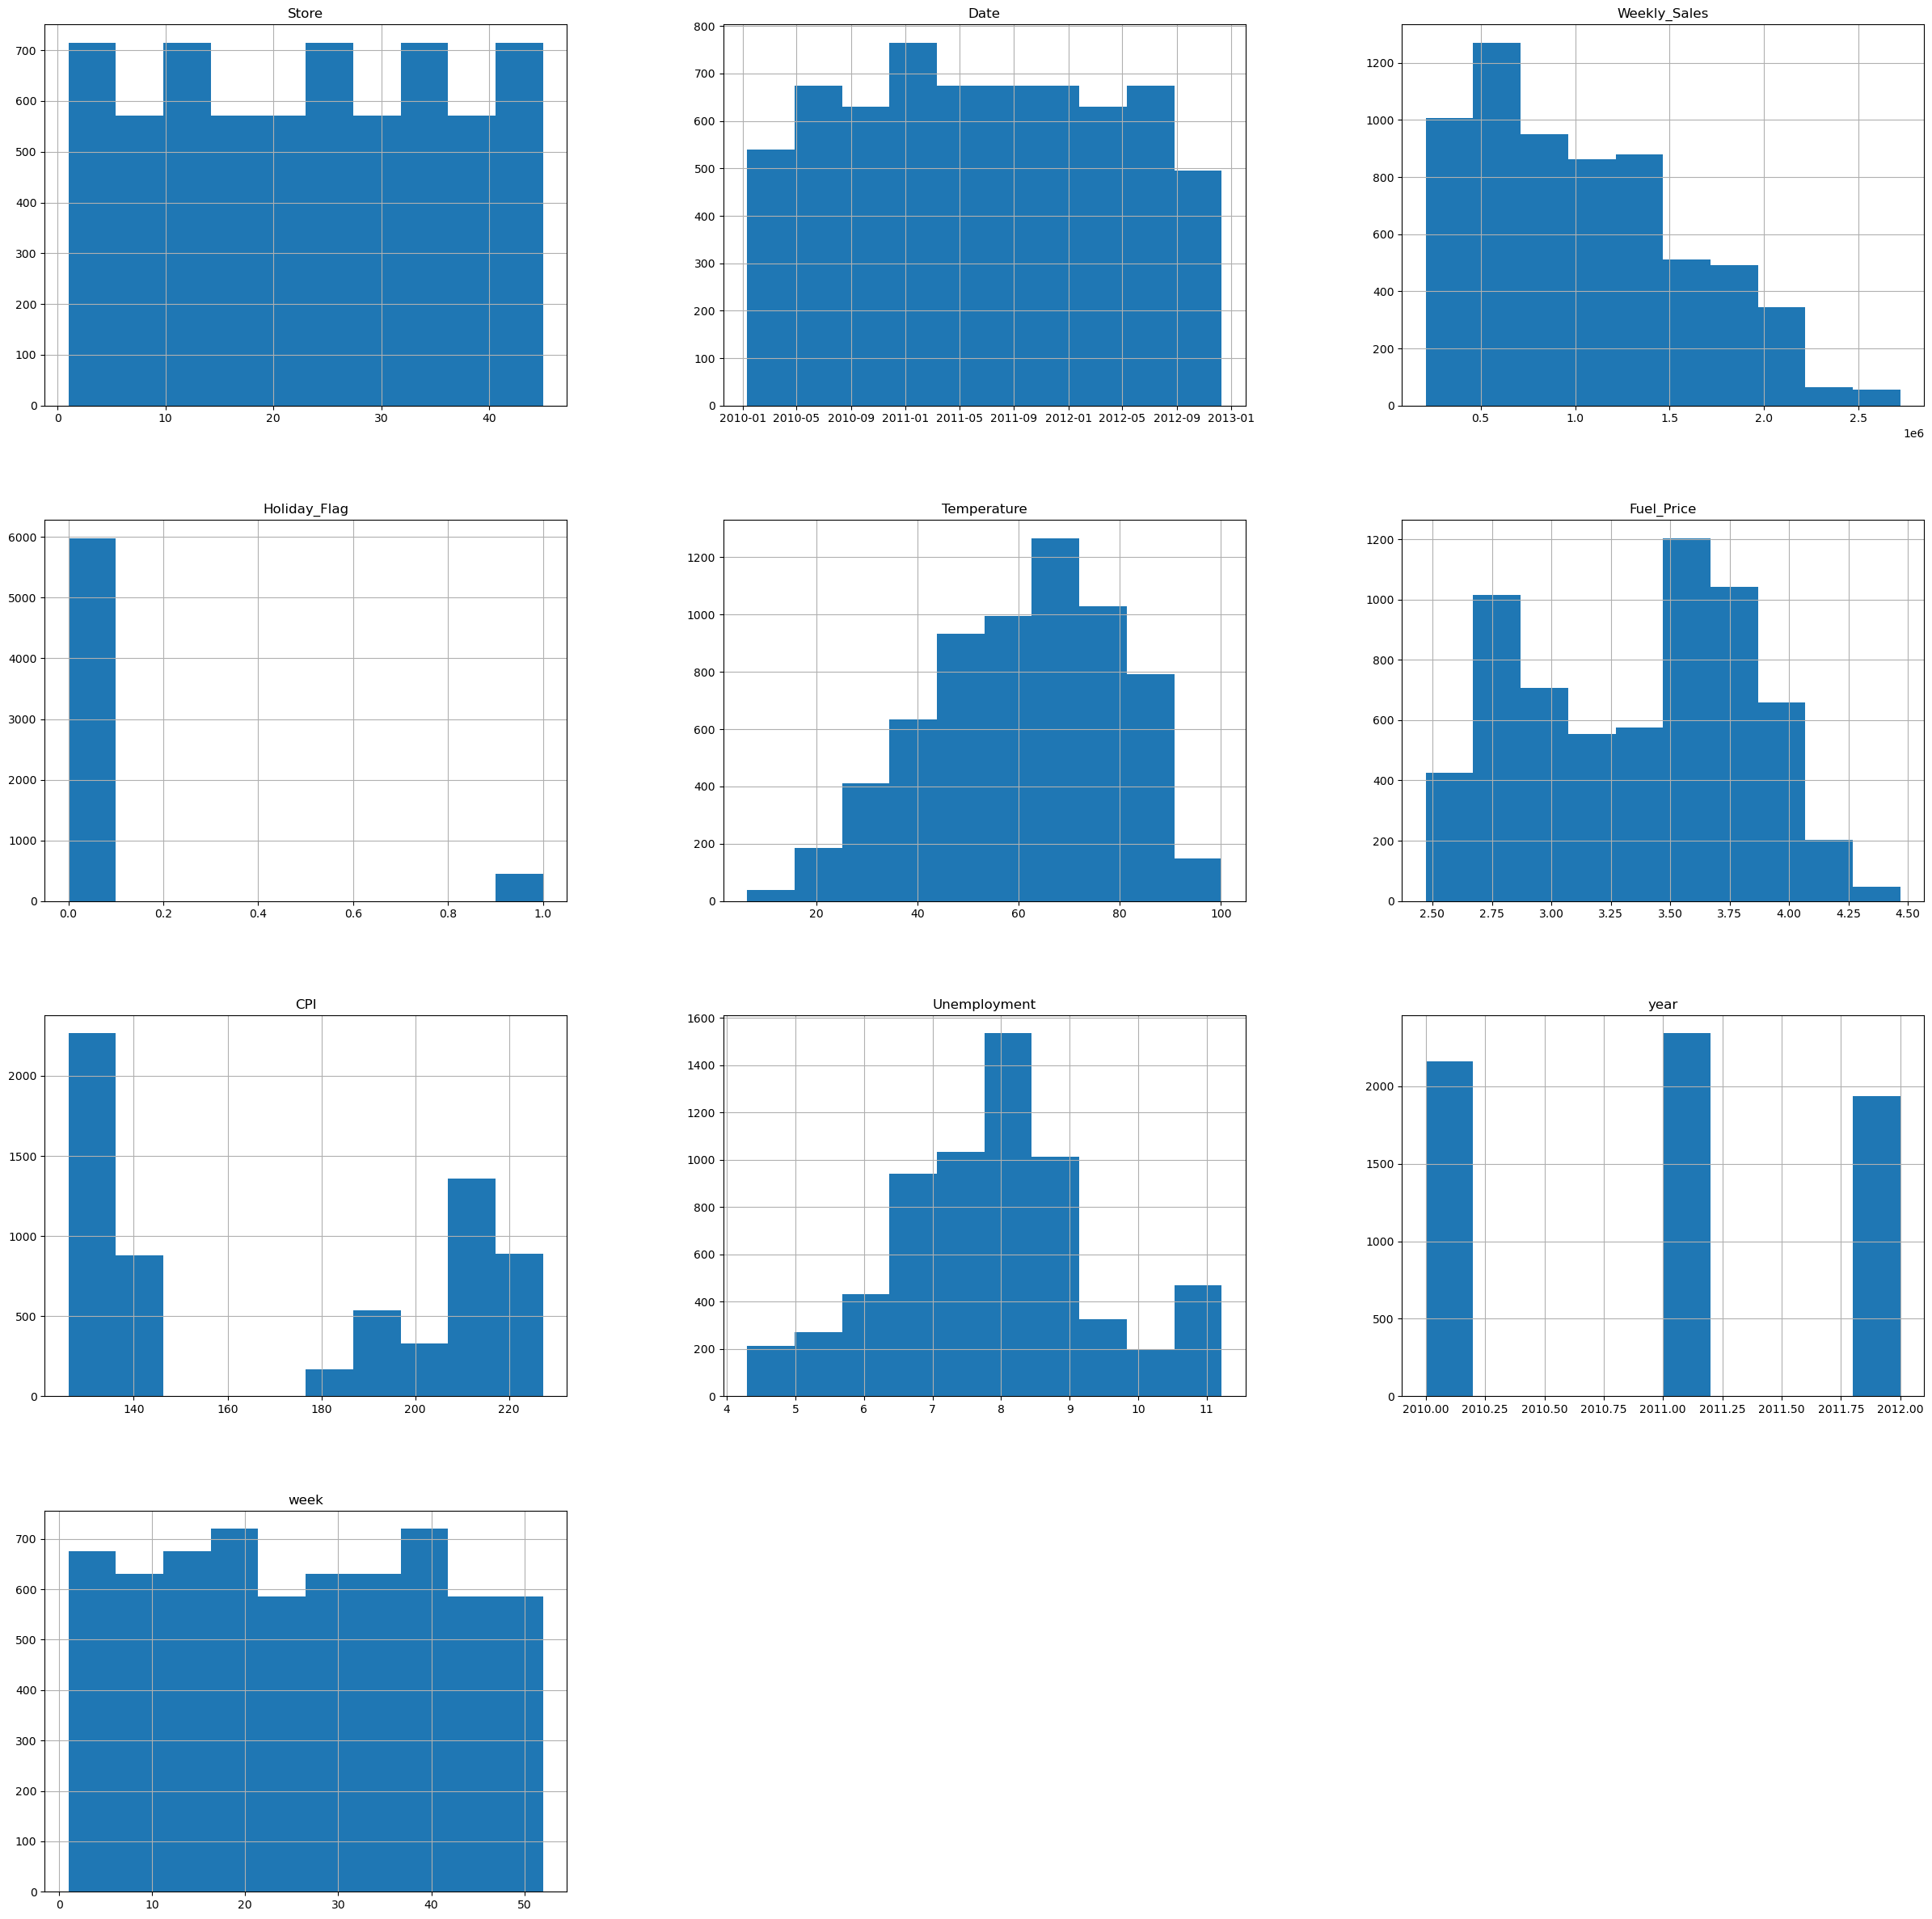

In [70]:
walmart.hist(figsize = (30,30))
plt.show()

<Axes: xlabel='Weekly_Sales', ylabel='Density'>

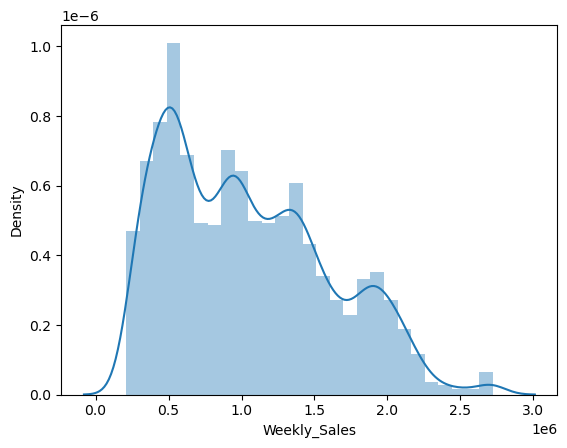

In [71]:
### Weekly Sales distribution 

sns.distplot(walmart['Weekly_Sales'],kde=True)

In [72]:
### Fuel Price and its Distribution 

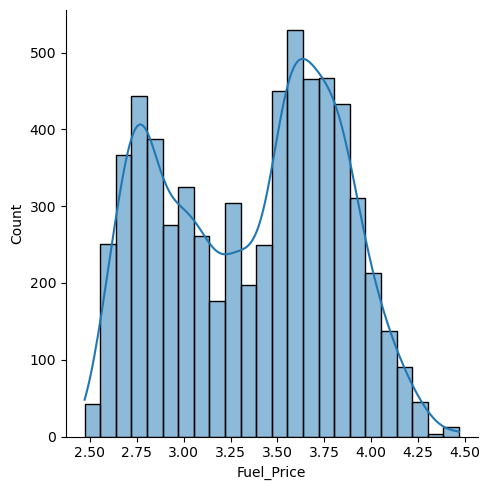

In [73]:
sns.displot(walmart['Fuel_Price'],kde=True)

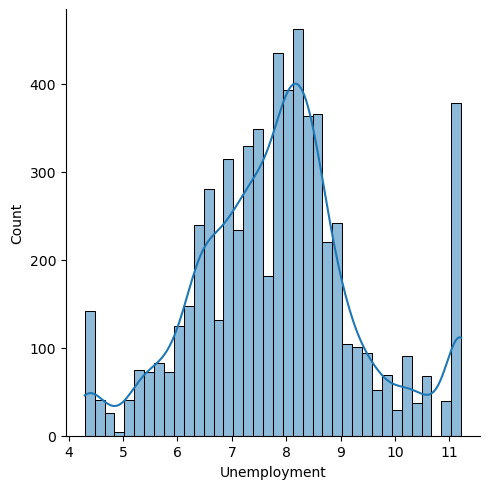

In [74]:
sns.displot(walmart['Unemployment'],kde=True)

<Axes: xlabel='CPI', ylabel='Density'>

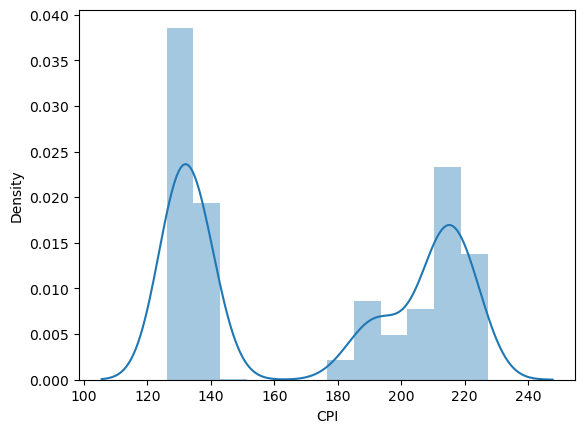

In [75]:
sns.distplot(walmart['CPI'],kde=True)

In [76]:
walmart["Weekly_Sales"].mean()

1045029.2189176378

In [77]:
walmart["Weekly_Sales"].median()

960746.04

#### What did I find from these histograms? 

1. The distribution of Weekly Sales is right skewed This is because, the mean of Weekly sales (1045029.21) is greater than its median (960746.04)

2. The fuel price has bimodal dsitrbution which means it has two peaks in it

3. The temperature is almost normally distributed 

4. Also, Unemployment is almost normally distributed 

5. There are two clusters for Consumer Price Index that is CPI

6. The number of transactions that occured among the stores has almost been equal along these years

### 24. Which store had the highest and least sales in 2010? 

In [78]:
walmart2010 = walmart[walmart.year==2010]
walmart2010

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year,week
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,Saturday,May,2010,17
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,Wednesday,December,2010,48
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,Thursday,February,2010,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,Thursday,February,2010,8
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,Sunday,May,2010,18
...,...,...,...,...,...,...,...,...,...,...,...,...
6335,45,2010-03-12,879244.90,0,40.93,3.046,182.667615,8.724,Thursday,March,2010,10
6336,45,2010-10-12,1002364.34,0,30.54,3.109,182.551954,8.724,Monday,October,2010,41
6337,45,2010-12-17,1123282.85,0,30.51,3.140,182.517732,8.724,Thursday,December,2010,50
6338,45,2010-12-24,1682862.03,0,30.59,3.141,182.544590,8.724,Thursday,December,2010,51


In [79]:
walmart2010.groupby("Store")["Weekly_Sales"].sum().sort_values(ascending = False)

Store
14    1.041201e+08
20    1.004649e+08
4     9.478535e+07
2     9.456223e+07
13    9.429990e+07
10    9.313267e+07
27    8.965539e+07
6     7.690512e+07
1     7.327883e+07
19    7.258053e+07
23    6.769520e+07
24    6.689065e+07
39    6.578228e+07
31    6.556027e+07
11    6.525514e+07
28    6.477876e+07
41    5.773822e+07
18    5.597842e+07
32    5.519094e+07
35    5.219597e+07
22    5.086528e+07
26    4.839070e+07
12    4.837038e+07
40    4.635736e+07
34    4.615042e+07
8     4.320447e+07
17    4.110492e+07
45    3.853634e+07
21    3.763111e+07
25    3.513627e+07
15    3.202353e+07
43    3.153701e+07
29    2.694683e+07
7     2.556808e+07
42    2.549809e+07
9     2.512922e+07
16    2.472863e+07
37    2.450847e+07
30    2.173909e+07
36    2.115313e+07
3     1.874542e+07
38    1.658779e+07
5     1.483603e+07
44    1.360752e+07
33    1.276683e+07
Name: Weekly_Sales, dtype: float64

<Axes: xlabel='Store'>

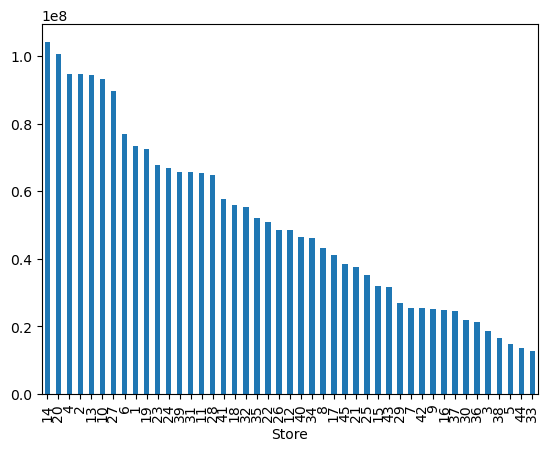

In [80]:
walmart2010.groupby("Store")["Weekly_Sales"].sum().sort_values(ascending = False).plot(kind = "bar")

#### Store 14 had the highest sales in the year 2010 with 104 million US dollars


#### Store 33 had the least sales in the year 2010 with 12.7 million US dollars

### 25. Which store had the highest and least sales in 2011?

In [81]:
walmart2011 = walmart[walmart.year==2011]
walmart2011

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year,week
48,1,2011-07-01,1444732.28,0,48.27,2.976,211.404742,7.742,Thursday,July,2011,26
49,1,2011-01-14,1391013.96,0,35.40,2.983,211.457411,7.742,Thursday,January,2011,2
50,1,2011-01-21,1327405.42,0,44.04,3.016,211.827234,7.742,Thursday,January,2011,3
51,1,2011-01-28,1316899.31,0,43.83,3.010,212.197058,7.742,Thursday,January,2011,4
52,1,2011-04-02,1606629.58,0,42.27,2.989,212.566881,7.742,Friday,April,2011,13
...,...,...,...,...,...,...,...,...,...,...,...,...
6387,45,2011-02-12,875699.81,0,50.19,3.452,188.502435,8.523,Friday,February,2011,6
6388,45,2011-09-12,957155.31,0,46.57,3.415,188.654469,8.523,Sunday,September,2011,37
6389,45,2011-12-16,1078905.68,0,39.93,3.413,188.797935,8.523,Thursday,December,2011,50
6390,45,2011-12-23,1521957.99,0,42.27,3.389,188.929975,8.523,Thursday,December,2011,51


In [82]:
walmart2011.groupby("Store")["Weekly_Sales"].sum().sort_values(ascending = False)

Store
4     1.098009e+08
20    1.087737e+08
14    1.054476e+08
13    1.035173e+08
2     9.810388e+07
10    9.791945e+07
27    9.190404e+07
1     8.092192e+07
6     8.052876e+07
39    7.577760e+07
19    7.484190e+07
31    7.416923e+07
23    7.227353e+07
11    7.052358e+07
24    6.993898e+07
28    6.915601e+07
41    6.671587e+07
32    6.134719e+07
18    5.421774e+07
22    5.355471e+07
12    5.258200e+07
26    5.204925e+07
34    5.036018e+07
40    5.034054e+07
8     4.751279e+07
17    4.639184e+07
35    4.408698e+07
45    4.113537e+07
21    4.023488e+07
25    3.643441e+07
15    3.228262e+07
43    3.205320e+07
7     3.066264e+07
42    2.911730e+07
9     2.868597e+07
29    2.795035e+07
16    2.742137e+07
37    2.708150e+07
30    2.218215e+07
3     2.081688e+07
38    1.994076e+07
36    1.897262e+07
5     1.647082e+07
44    1.549819e+07
33    1.295784e+07
Name: Weekly_Sales, dtype: float64

#### Store 4 had the highest sales in 2011 with 109 million US dollars 

#### Store 33 had the least sales in 2011 with 12.9 million US dollars

### 26. Which store had the highest and least sales in 2012 ?

In [83]:
walmart2012 = walmart[walmart.year==2012]
walmart2012

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year,week
100,1,2012-06-01,1550369.92,0,49.01,3.157,219.714258,7.348,Thursday,June,2012,22
101,1,2012-01-13,1459601.17,0,48.53,3.261,219.892526,7.348,Thursday,January,2012,2
102,1,2012-01-20,1394393.84,0,54.11,3.268,219.985689,7.348,Thursday,January,2012,3
103,1,2012-01-27,1319325.59,0,54.26,3.290,220.078852,7.348,Thursday,January,2012,4
104,1,2012-03-02,1636339.65,0,56.55,3.360,220.172015,7.348,Thursday,March,2012,9
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,Thursday,September,2012,39
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,Wednesday,May,2012,19
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,Sunday,December,2012,50
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,Thursday,October,2012,42


In [84]:
walmart2012.groupby("Store")["Weekly_Sales"].sum().sort_values(ascending = False)

Store
4     92771189.24
20    89827709.38
13    86707455.02
2     81496695.37
10    78228616.94
14    77441398.26
27    71920056.12
1     68202058.02
6     66315047.00
39    65885662.85
31    59884407.22
19    59212433.28
23    58767978.75
11    58184065.68
24    57186396.17
41    56887839.93
28    55328907.07
32    50281116.00
18    44918576.80
12    43334845.72
26    42976444.29
22    42655656.23
34    41739164.15
40    41172407.34
17    40285378.63
8     39233920.13
35    35237722.52
45    32723630.17
21    30251886.71
25    29490505.71
43    26975233.97
7     25367556.47
42    24950359.85
15    24827530.71
9     23974029.58
37    22612774.69
29    22244381.62
16    22102425.32
30    18795650.08
38    18631073.45
3     18024439.50
44    14187373.72
5     14168838.13
36    13286470.53
33    11435551.03
Name: Weekly_Sales, dtype: float64

#### Store 4 had the highest sales in 2012 with 92 million US dollars

#### Store 33 had the least sales in 2012 with 11.4 million US dollars

### 27. Which store had the highest and least Sales during thursday? 

(As thursday has the highest number of sales and transactions, we will check that)

In [85]:
walmart_thursday = walmart[walmart["day"]== "Thursday"]
walmart_thursday

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year,week
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,Thursday,February,2010,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,Thursday,February,2010,8
5,1,2010-12-03,1439541.59,0,57.79,2.667,211.380643,8.106,Thursday,December,2010,48
6,1,2010-03-19,1472515.79,0,54.58,2.720,211.215635,8.106,Thursday,March,2010,11
7,1,2010-03-26,1404429.92,0,51.45,2.732,211.018042,8.106,Thursday,March,2010,12
...,...,...,...,...,...,...,...,...,...,...,...,...
6428,45,2012-09-14,702238.27,0,67.87,3.948,191.699850,8.684,Thursday,September,2012,37
6429,45,2012-09-21,723086.20,0,65.32,4.038,191.856704,8.684,Thursday,September,2012,38
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,Thursday,September,2012,39
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,Thursday,October,2012,42


In [86]:
walmart_thursday.groupby("Store")["Weekly_Sales"].sum().sort_values(ascending = False)

Store
4     1.991235e+08
20    1.965479e+08
13    1.901290e+08
14    1.890735e+08
2     1.817982e+08
10    1.793949e+08
27    1.694102e+08
6     1.486040e+08
1     1.466535e+08
39    1.398209e+08
19    1.371306e+08
31    1.336844e+08
23    1.330579e+08
11    1.289966e+08
24    1.279817e+08
41    1.214700e+08
28    1.213975e+08
32    1.125330e+08
18    1.032271e+08
22    9.813591e+07
12    9.634193e+07
26    9.430728e+07
34    9.270698e+07
40    9.041704e+07
35    8.735800e+07
8     8.634003e+07
17    8.608359e+07
45    7.536504e+07
21    7.340608e+07
25    6.781388e+07
43    6.014942e+07
15    5.964419e+07
7     5.526759e+07
42    5.201249e+07
9     5.179780e+07
29    5.159720e+07
16    5.014244e+07
37    4.959850e+07
30    4.185736e+07
3     3.815584e+07
38    3.622758e+07
36    3.524859e+07
5     3.023582e+07
44    2.908726e+07
33    2.450083e+07
Name: Weekly_Sales, dtype: float64

<Axes: xlabel='Store'>

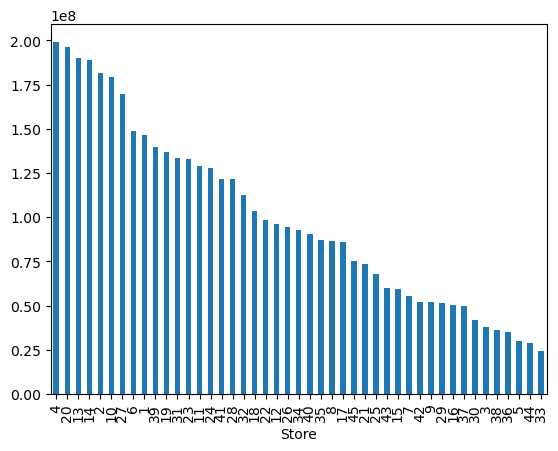

In [87]:
walmart_thursday.groupby("Store")["Weekly_Sales"].sum().sort_values(ascending = False).plot(kind = "bar")

#### Store 4 followed by store 20 had the highest sales on Thursday among all Walmart stores with 199 million US dollars and 196 million US dollars respectively 

#### Store 33 had the least sales on Thursday with 24.5 million US dollars

### 28. Which store performed really well and performed least during the month of April when the sales was at its peak ?

In [88]:
walmart_april = walmart[walmart["month"] == "April"]
walmart_april

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year,week
10,1,2010-04-16,1466058.28,0,66.32,2.808,210.488700,7.808,Thursday,April,2010,15
11,1,2010-04-23,1391256.12,0,64.84,2.795,210.439123,7.808,Thursday,April,2010,16
12,1,2010-04-30,1425100.71,0,67.41,2.780,210.389546,7.808,Thursday,April,2010,17
17,1,2010-04-06,1615524.71,0,80.69,2.705,211.176428,7.808,Monday,April,2010,14
52,1,2011-04-02,1606629.58,0,42.27,2.989,212.566881,7.742,Friday,April,2011,13
...,...,...,...,...,...,...,...,...,...,...,...,...
6383,45,2011-04-11,833429.22,0,43.92,3.551,187.970363,8.523,Sunday,April,2011,15
6406,45,2012-04-13,781970.60,0,51.83,4.044,190.759596,8.567,Thursday,April,2012,15
6407,45,2012-04-20,776661.74,0,63.13,4.027,190.813801,8.567,Thursday,April,2012,16
6408,45,2012-04-27,711571.88,0,53.20,4.004,190.868006,8.567,Thursday,April,2012,17


In [89]:
walmart_april.groupby("Store")["Weekly_Sales"].sum().sort_values(ascending = False)

Store
20    28998888.90
14    28601074.56
4     28448548.78
13    27267321.24
2     26432257.45
10    26154802.55
27    24308232.52
1     21713919.82
6     21596335.90
39    19787112.91
19    19640358.21
31    19319556.90
11    18976602.13
28    18960868.94
23    18265836.51
24    18128114.13
41    17032967.11
32    15799392.31
18    14923149.60
12    14308591.27
22    14048332.15
34    13373867.70
26    12871816.32
40    12799741.06
8     12597656.58
17    12526735.98
35    12351421.04
45    10879534.13
21    10310802.26
25     9632291.97
43     8957203.18
15     8315747.71
42     7786792.27
9      7604927.85
29     7412841.69
37     7383647.36
7      6575952.13
30     6290286.62
16     6068480.55
3      5603889.04
38     5450815.40
36     5394744.17
5      4555809.34
44     4151037.69
33     3715583.69
Name: Weekly_Sales, dtype: float64

<Axes: xlabel='Store'>

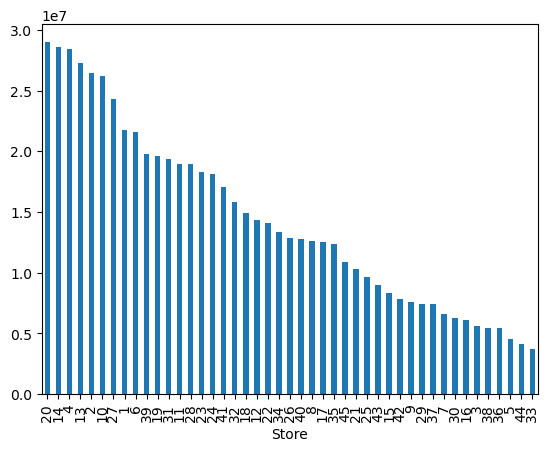

In [90]:
walmart_april.groupby("Store")["Weekly_Sales"].sum().sort_values(ascending = False).plot(kind = "bar")

#### Store 20 performed well in sales during the month of April among the walmart stores when the sales was at its peak at 28.9 million US dollars. Store 14 and Store 4 are in the top contention among the sales in the next places after Store 20. 

#### Store 33 performed the least at 3.7 million US dollars among all the stores sales performance in the month of April

### 29. Which store performed well and performed least during the 41st week when the sales was at its peak? 

In [91]:
walmart_41stweek = walmart[walmart["week"]==41]
walmart_41stweek

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year,week
36,1,2010-10-15,1459409.10,0,67.18,2.720,211.813744,7.838,Thursday,October,2010,41
44,1,2010-10-12,1682614.26,0,46.33,2.843,211.465953,7.838,Monday,October,2010,41
88,1,2011-10-14,1493525.93,0,71.74,3.274,217.355273,7.866,Thursday,October,2011,41
131,1,2012-10-08,1592409.97,0,85.05,3.494,221.958433,6.908,Sunday,October,2012,41
179,2,2010-10-15,1794355.49,0,65.80,2.720,211.471329,8.163,Thursday,October,2010,41
...,...,...,...,...,...,...,...,...,...,...,...,...
6280,44,2012-10-08,333594.81,0,81.69,3.509,130.756161,5.407,Sunday,October,2012,41
6328,45,2010-10-15,715263.30,0,58.61,2.868,182.810620,8.724,Thursday,October,2010,41
6336,45,2010-10-12,1002364.34,0,30.54,3.109,182.551954,8.724,Monday,October,2010,41
6380,45,2011-10-14,720946.99,0,63.82,3.541,187.691748,8.523,Thursday,October,2011,41


In [92]:
walmart_41stweek.groupby("Store")["Weekly_Sales"].sum().sort_values(ascending=False)

Store
20    8.825401e+06
4     8.437766e+06
13    8.283578e+06
14    8.072123e+06
2     7.783684e+06
10    7.700830e+06
27    7.271312e+06
1     6.227959e+06
6     6.154220e+06
19    5.896202e+06
39    5.895896e+06
24    5.724189e+06
23    5.686266e+06
31    5.506350e+06
11    5.414883e+06
41    5.320498e+06
28    5.114326e+06
32    4.876905e+06
18    4.366625e+06
22    4.239754e+06
26    4.196932e+06
40    3.973757e+06
12    3.896644e+06
34    3.891677e+06
8     3.689543e+06
35    3.568185e+06
17    3.533890e+06
45    3.171612e+06
21    3.008955e+06
25    2.938236e+06
15    2.552060e+06
43    2.533075e+06
42    2.334612e+06
7     2.240986e+06
29    2.191251e+06
9     2.141121e+06
16    2.074551e+06
37    2.024734e+06
30    1.724166e+06
3     1.573321e+06
38    1.530829e+06
36    1.498878e+06
5     1.226370e+06
44    1.173588e+06
33    1.075024e+06
Name: Weekly_Sales, dtype: float64

<Axes: xlabel='Store'>

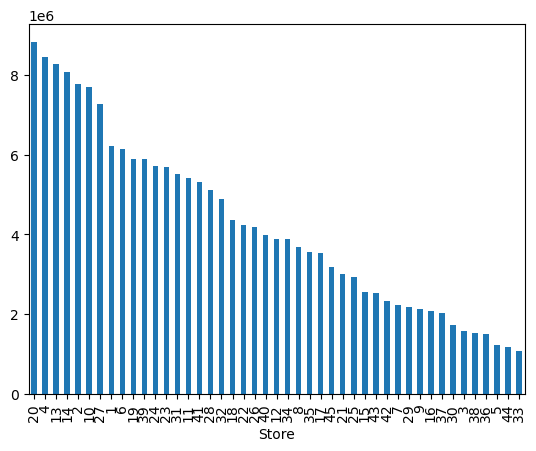

In [93]:
walmart_41stweek.groupby("Store")["Weekly_Sales"].sum().sort_values(ascending=False).plot(kind = "bar")

#### Store 20 had the highest sales among stores in the 41st week among all stores at 8.8 million US dollars

#### Store 4, Store 13, and Store 14 are the next spots in sales during that same week 

#### Store 33 had the lowest sales among stores in the 41st week at 1.75 million US dollars

### 30. What is the general trend of numerical variables in Walmart stores dataset? 

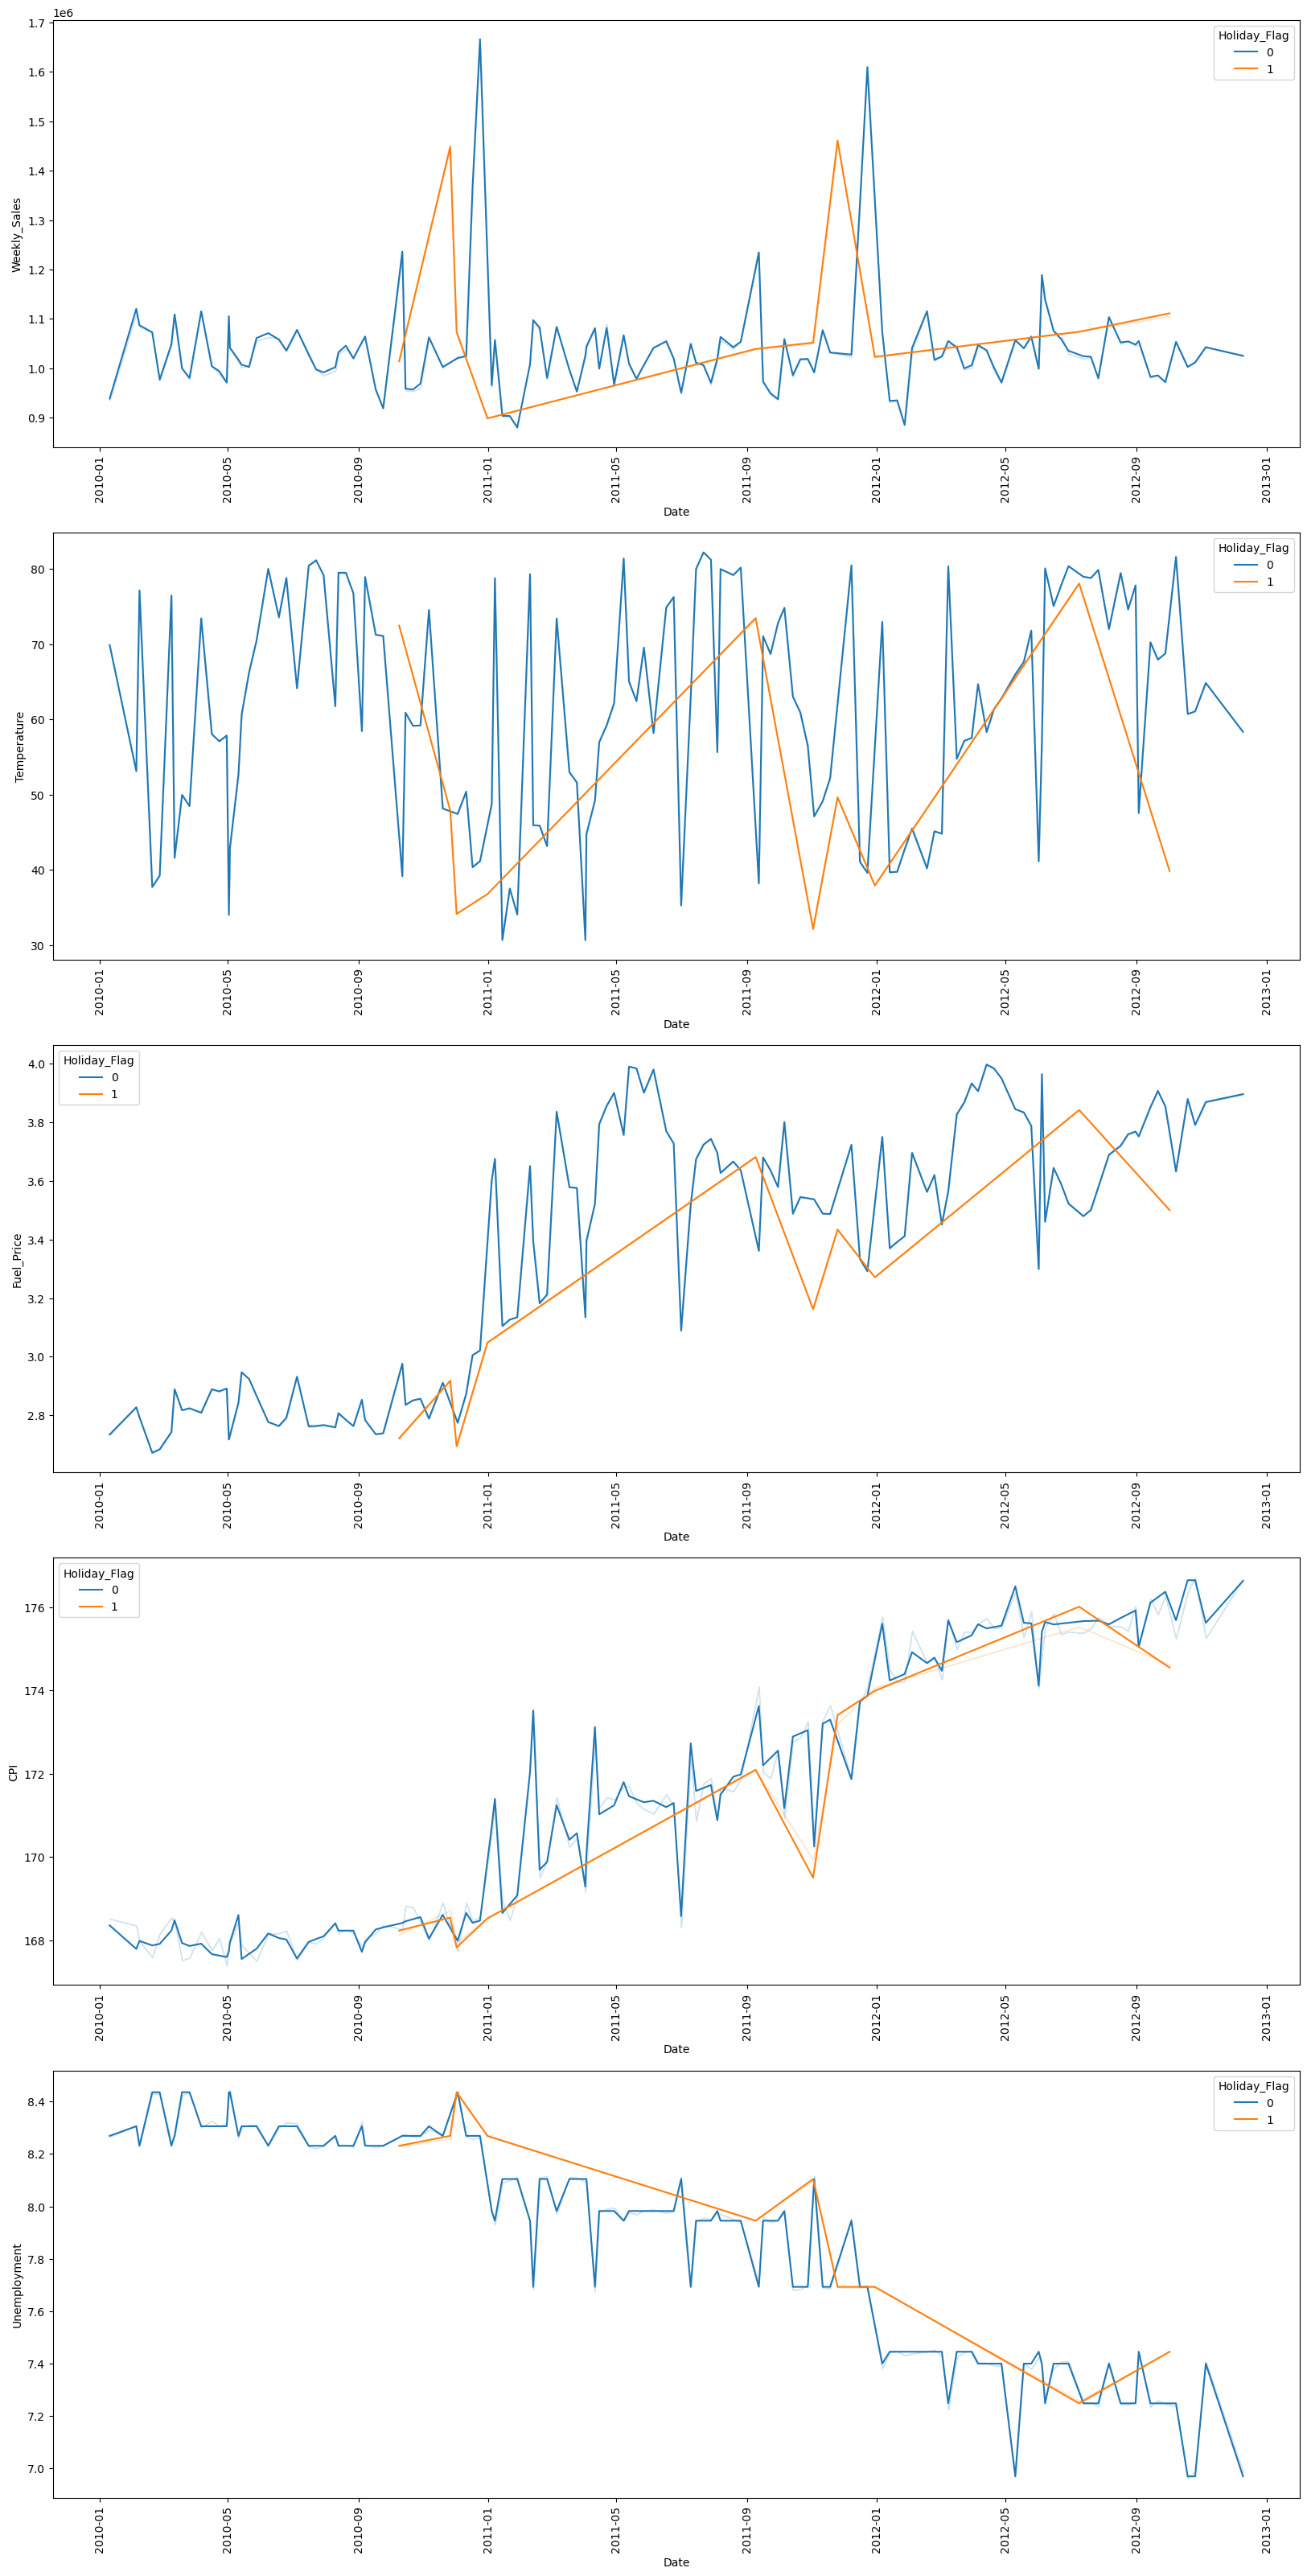

In [94]:
pno = 1
plt.figure(figsize=(20,40))
for i in ["Weekly_Sales","Temperature","Fuel_Price","CPI","Unemployment"]:
        if pno<=5:
            plt.subplot(5,1,pno)
            ax = sns.lineplot(data = walmart , x = "Date" ,y = i  , hue = walmart.Holiday_Flag , ci = False );
            plt.xticks(rotation = 90)
            pno+=1

#### Some findings from the line plot 

- There has been an upward rise in the trend of CPI and fuel price 
- There is a seasonality in tempeature and it's flow remains cyclical 
- Similarly, the store sales is rising and falling and there is a small upward rise in its trend for the time being
- The trend of unemployment is falling as this was the time the 2008 subprime crisis in the US started to slowly settle down and some people who lost jobs got them back. But not all of them got their jobs back as per various economists and their observation. 
- There has been a jobless growth that is reflected in the steady rise in CPI and fuel price that fell in the midway of 2012

## Conclusions from the Exploratory data analysis (EDA)


1. As Thursday is the highest in terms of day-based sales, Thursday is the best day in the week for providing added discounts and promotions

2. With April topping in sales of all stores, April is the best month for providing any discounts or coupons. Not just during April, during May, July, September, October, and December, Walmart needs to stock items as there might be a rise in demand during these times.  

3. 41st week that is first and second week of October is the best time for any weekly discounts offered to customers. Also, walmart needs to stock more during this time as it is the start of Holiday season sales like Single's day. 

4. 2011 had the highest sales among all the three years

5. As most sales occur during the non-holiday weeks, Walmart must keep its stock reserved for these times than the holiday week



#### The 17th, 41st, 19th, 37th, 28th, 1st and 15th - All these weeks had the highest number of transactions (190)

#### All these weeks had the lowest number of transactions (90)

- 4th week     
- 22nd week   
- 31st week     
- 26th week  
- 9th week      
- 6th week      
- 39th week      
- 2nd week      
- 46th week      
- 52th week      
- 51st week      
- 47th week      
- 49th week    
- 18th week      
- 35th week      
- 27th week      
- 48th week      
- 14th week     
- 45th week 

### So, Walmart needs to stock its items more before the weeks when it performs the best and lesser when it performs the least

## Top 15 Walmart Stores that perform best on a weekly, monthly, daily, and yearly basis 

1. Store 20
2. Store 4
3. Store 13
4. Store 14
5. Store 2
6. Store 10
7. Store 27
8. Store 1
9. Store 6
10. Store 19
11. Store 39
12. Store 31
13. Store 23
14. Store 24
15. Store 11

#### Ensure that these best performing stores doesn't run out of stock as they consistently perform on a yearly, weekly, monthly and daily basis. 

## Top 15 Walmart stores that performs least on a weekly, monthly, daily and yearly basis 

1. Store 33
2. Store 44
3. Store 5
4. Store 36
5. Store 38
6. Store 3
7. Store 30
8. Store 37
9. Store 16
10. Store 9
11. Store 29
12. Store 42
13. Store 7
14. Store 43
15. Store 15

#### These stores didn't get enough public attention or footfall traffic for transactions 

#### So, it is better to minimize the stocks in these stores and focus on getting more transactions in this area and then maximize the stock keeping units (SKU) accordingly

#### Trying omnichannel sales can be another way or Walmart can change these regions into cloud stores like how it did during COVID-19 pandemic

#### Integrating some of these stores in the region where customers from two different areas can travel and get back to their homes quickly. So, they can utilize network optimization to place their shops near densely populated customer regions. 



## Step 4: Feature Engineering 

In [95]:
walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year,week
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,Saturday,May,2010,17
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,Wednesday,December,2010,48
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,Thursday,February,2010,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,Thursday,February,2010,8
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,Sunday,May,2010,18


In [96]:
df = walmart.copy()

In [97]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year,week
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,Saturday,May,2010,17
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,Wednesday,December,2010,48
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,Thursday,February,2010,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,Thursday,February,2010,8
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,Sunday,May,2010,18


In [98]:
df.drop(df.columns[[1,8,9,10,11]], axis =1, inplace = True)

In [99]:
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,1554806.68,0,46.50,2.625,211.350143,8.106


In [100]:
## Let's do a one-hot encoding for the store ahd holiday_flag 

In [101]:
df_dummies = pd.get_dummies(df,columns=['Store','Holiday_Flag'], drop_first = True)
print(df_dummies.columns.to_list())

['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Store_2', 'Store_3', 'Store_4', 'Store_5', 'Store_6', 'Store_7', 'Store_8', 'Store_9', 'Store_10', 'Store_11', 'Store_12', 'Store_13', 'Store_14', 'Store_15', 'Store_16', 'Store_17', 'Store_18', 'Store_19', 'Store_20', 'Store_21', 'Store_22', 'Store_23', 'Store_24', 'Store_25', 'Store_26', 'Store_27', 'Store_28', 'Store_29', 'Store_30', 'Store_31', 'Store_32', 'Store_33', 'Store_34', 'Store_35', 'Store_36', 'Store_37', 'Store_38', 'Store_39', 'Store_40', 'Store_41', 'Store_42', 'Store_43', 'Store_44', 'Store_45', 'Holiday_Flag_1']


In [102]:
## Scaling the data

x = df_dummies.drop(['Weekly_Sales'],axis=1)
y = df_dummies.Weekly_Sales


In [103]:
x

,Temperature,Fuel_Price,CPI,Unemployment,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,...,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45,Holiday_Flag_1
0,42.31,2.572,211.096358,8.106,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,38.51,2.548,211.242170,8.106,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,39.93,2.514,211.289143,8.106,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,46.63,2.561,211.319643,8.106,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,46.50,2.625,211.350143,8.106,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,64.88,3.997,192.013558,8.684,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6431,64.89,3.985,192.170412,8.667,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6432,54.47,4.000,192.327265,8.667,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6433,56.47,3.969,192.330854,8.667,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [104]:
y

0       1643690.90
1       1641957.44
2       1611968.17
3       1409727.59
4       1554806.68
           ...    
6430     713173.95
6431     733455.07
6432     734464.36
6433     718125.53
6434     760281.43
Name: Weekly_Sales, Length: 6435, dtype: float64

In [105]:
#importing Standard Scaler

from sklearn.preprocessing import StandardScaler  

In [106]:
## Splitting the data into training and testing sets 

from sklearn.model_selection import train_test_split


In [107]:
x_train,x_test,y_train,y_test = train_test_split(x,y , test_size=0.30 , random_state = 123)

In [108]:
st = StandardScaler()

In [109]:
x_train_scaled = st.fit_transform(x_train)

In [110]:
x_train_scaled

array([[ 0.04934613, -1.23105994,  1.08682047, ..., -0.15895745,
        -0.15068719, -0.27234397],
       [-1.61087422,  0.14170881,  1.05175872, ..., -0.15895745,
        -0.15068719, -0.27234397],
       [-0.21817246,  1.49039389, -1.02560551, ..., -0.15895745,
        -0.15068719, -0.27234397],
       ...,
       [ 0.11729585,  0.78539941, -1.08361136, ..., -0.15895745,
        -0.15068719, -0.27234397],
       [ 0.7973281 , -1.23543879,  0.84297693, ..., -0.15895745,
        -0.15068719, -0.27234397],
       [-1.34175052, -1.15224068, -1.0010233 , ..., -0.15895745,
        -0.15068719, -0.27234397]])

In [111]:
x_test_scaled = st.transform(x_test)

In [112]:
x_test_scaled 

array([[-0.2748864 ,  1.77939784, -0.84689071, ..., -0.15895745,
        -0.15068719, -0.27234397],
       [ 0.6619637 , -0.95081369, -0.98151818, ..., -0.15895745,
        -0.15068719, -0.27234397],
       [-1.01965814, -0.02468741, -1.08911961, ...,  6.2909917 ,
        -0.15068719, -0.27234397],
       ...,
       [ 1.44044279,  0.36503004,  1.20494264, ..., -0.15895745,
        -0.15068719, -0.27234397],
       [-1.49263101, -0.98146562, -0.90939106, ..., -0.15895745,
        -0.15068719, -0.27234397],
       [ 1.50143702,  0.81605135,  1.29348108, ..., -0.15895745,
        -0.15068719,  3.67182722]])

In [113]:
x_train

,Temperature,Fuel_Price,CPI,Unemployment,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,...,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45,Holiday_Flag_1
1155,61.26,2.795,213.949614,6.3840,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3532,30.23,3.422,212.571112,6.9610,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3972,56.26,4.038,130.896645,11.2185,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
283,60.97,3.601,223.015426,6.1700,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6233,67.54,3.641,129.430600,6.5600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5218,82.41,3.648,213.791715,8.3000,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4060,33.52,3.437,133.614143,10.2560,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1346,62.53,3.716,128.616064,8.7440,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3454,75.24,2.793,204.362566,7.5270,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [114]:
y_train

1155     488683.57
3532     636419.12
3972    1216059.41
283     1900745.13
6233     303974.28
           ...    
5218     509647.25
4060     536031.67
1346    1815798.85
3454     719591.13
3582     893613.00
Name: Weekly_Sales, Length: 4504, dtype: float64

In [115]:
x_test

,Temperature,Fuel_Price,CPI,Unemployment,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,...,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45,Holiday_Flag_1
2689,55.20,4.170,137.923067,8.150,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2601,72.71,2.923,132.630000,8.099,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6206,41.28,3.346,128.399500,7.224,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5926,75.93,3.917,128.955300,8.494,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5863,54.34,2.962,126.442065,9.765,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1971,50.04,3.953,190.610746,8.424,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2183,35.76,2.748,190.951728,6.986,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1074,87.26,3.524,218.593751,6.425,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3720,32.44,2.909,135.465778,8.237,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [116]:
y_test

2689    1255087.26
2601    1418027.08
6206     284496.14
5926     534597.69
5863     543384.01
           ...    
1971    1905033.01
2183     495022.51
1074     883683.35
3720    1945070.33
4282     433565.77
Name: Weekly_Sales, Length: 1931, dtype: float64

In [117]:
print(x_train.shape, y_train.shape)

print(x_test.shape, y_test.shape)

(4504, 49) (4504,)
(1931, 49) (1931,)


## Step 5: Model Building and Evaluation

### Linear Regression

In [118]:
from sklearn.linear_model import LinearRegression

In [119]:
LR = LinearRegression()
LR.fit(x_train_scaled,y_train)

LinearRegression()

In [120]:
print(LR.intercept_)

1042678.655652198


In [121]:
print(LR.coef_)

[ -10897.21511963  -17126.82651429  140038.59072676  -31367.53391703
   53357.32502627 -167650.13472159  120213.35317133 -181031.67556812
    1066.97061887 -135897.25087193  -98458.66091356 -161490.87335383
   97930.89758763  -31256.22322856  -21736.85839418  108366.25443587
   88777.06532926  -88054.46225359 -149964.32327983  -57619.41461354
  -22866.91368454   30924.72574028   79612.64727854 -113753.01236022
  -34623.01273926   11316.73900676   17138.47760305 -125009.89264232
  -41739.76362371   69323.46606715   26937.24391263  -98085.35998723
 -160774.59239873  -22948.55263803  -44677.48385278 -141729.39463917
  -32613.92030212  -50044.96870257 -162962.77376885 -151229.47364423
 -113234.99773262  -15295.7838849   -52673.85422467  -32801.64899304
  -98741.82741521 -119878.30872805 -149001.27499384  -94742.71140179
   16180.68031051]


In [122]:
coeff_df = pd.DataFrame(LR.coef_, x.columns,  columns = ["Coefficient"])

In [123]:
coeff_df

,Coefficient
Temperature,-10897.215120
Fuel_Price,-17126.826514
CPI,140038.590727
Unemployment,-31367.533917
Store_2,53357.325026
Store_3,-167650.134722
Store_4,120213.353171
Store_5,-181031.675568
Store_6,1066.970619
Store_7,-135897.250872


In [124]:
## Predicting the test set 

yy_pred = LR.predict(x_test_scaled)

In [125]:
## Predicting the train set 

yy_pred_train = LR.predict(x_train_scaled)

In [126]:
from sklearn import metrics

from sklearn.metrics import r2_score

In [127]:
## R2 score for test 

r2_score(y_test , yy_pred)

0.9304859653121611

In [128]:
## Evaluation metrics for test predictions

print("MAE: ", metrics.mean_absolute_error(y_test, yy_pred))
print("MSE: ",metrics.mean_squared_error(y_test, yy_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, yy_pred)))

MAE:  89696.56014778727
MSE:  21814046532.09171
RMSE:  147695.79050227432


In [129]:
y_test.describe()

count    1.931000e+03
mean     1.050512e+06
std      5.603306e+05
min      2.099862e+05
25%      5.579893e+05
50%      9.693875e+05
75%      1.425581e+06
max      2.720371e+06
Name: Weekly_Sales, dtype: float64

In [130]:
### R2 score for train

r2_train = r2_score(y_train, yy_pred_train) 

print(r2_train)

0.9314861747609847


In [131]:
## Evaluation metrics for training set predictions 

print("MAE: ", metrics.mean_absolute_error(y_train, yy_pred_train))
print("MSE: ",metrics.mean_squared_error(y_train, yy_pred_train))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, yy_pred_train)))

MAE:  88789.32063015083
MSE:  21178123350.532562
RMSE:  145527.05367227277


<Axes: xlabel='Weekly_Sales', ylabel='Density'>

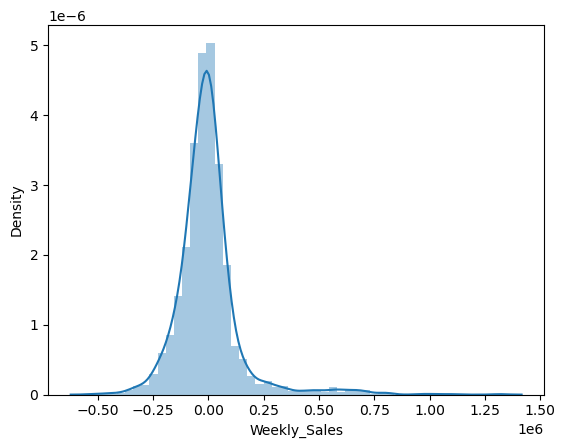

In [132]:
## Plotting the residuals to check its normality 

sns.distplot(y_test - yy_pred)

In [133]:
## Let's check for some multicollinearity 

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = []

for i in range(x_train_scaled.shape[1]):
    vif.append(variance_inflation_factor(x_train_scaled, i))

In [134]:
vif

[1.507230545562437,
 2.658555198590951,
 454.938516456174,
 15.178384116195227,
 1.8657565492423303,
 1.9020490392240614,
 56.92650386655188,
 2.048660310188452,
 1.9176907442158506,
 4.879745710651533,
 2.069769219941124,
 2.2197826430390917,
 48.75378147478494,
 1.9153766714511082,
 48.63262499482311,
 53.99217841429768,
 7.420964733078725,
 39.67449247768044,
 6.548723202145214,
 55.35251839414366,
 41.001968984575036,
 41.03783516882141,
 2.2866705375013594,
 1.8670356972474336,
 38.895964272043756,
 53.63726348195544,
 43.74054770977282,
 2.4538460521624703,
 48.23055749755443,
 35.73305825782674,
 44.81155222311941,
 39.103965334145485,
 1.857118936104001,
 1.8760851718575577,
 4.693094328809484,
 51.82457098320867,
 43.388518613095414,
 41.17053614923889,
 1.8168893427948807,
 1.9109849019394034,
 44.768528077566735,
 1.97015461605581,
 52.112354327694696,
 5.3668998277606885,
 52.176496240933425,
 2.407286919000898,
 59.038932592056184,
 7.145696600959077,
 1.0467892864230912]

In [135]:
pd.DataFrame({'vif':vif}, index = x.columns).T

,Temperature,Fuel_Price,CPI,Unemployment,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,...,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45,Holiday_Flag_1
vif,1.507231,2.658555,454.938516,15.178384,1.865757,1.902049,56.926504,2.04866,1.917691,4.879746,...,1.910985,44.768528,1.970155,52.112354,5.3669,52.176496,2.407287,59.038933,7.145697,1.046789


<Axes: >

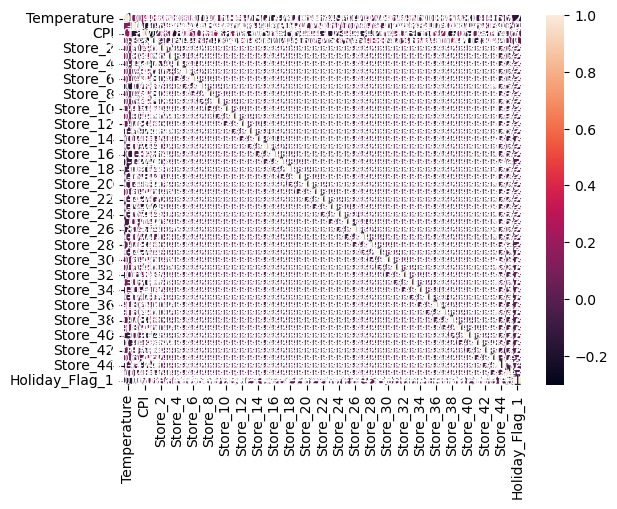

In [136]:
sns.heatmap(x.corr(), annot=True)

Feature: 0, Score: -10897.21512
Feature: 1, Score: -17126.82651
Feature: 2, Score: 140038.59073
Feature: 3, Score: -31367.53392
Feature: 4, Score: 53357.32503
Feature: 5, Score: -167650.13472
Feature: 6, Score: 120213.35317
Feature: 7, Score: -181031.67557
Feature: 8, Score: 1066.97062
Feature: 9, Score: -135897.25087
Feature: 10, Score: -98458.66091
Feature: 11, Score: -161490.87335
Feature: 12, Score: 97930.89759
Feature: 13, Score: -31256.22323
Feature: 14, Score: -21736.85839
Feature: 15, Score: 108366.25444
Feature: 16, Score: 88777.06533
Feature: 17, Score: -88054.46225
Feature: 18, Score: -149964.32328
Feature: 19, Score: -57619.41461
Feature: 20, Score: -22866.91368
Feature: 21, Score: 30924.72574
Feature: 22, Score: 79612.64728
Feature: 23, Score: -113753.01236
Feature: 24, Score: -34623.01274
Feature: 25, Score: 11316.73901
Feature: 26, Score: 17138.47760
Feature: 27, Score: -125009.89264
Feature: 28, Score: -41739.76362
Feature: 29, Score: 69323.46607
Feature: 30, Score: 269

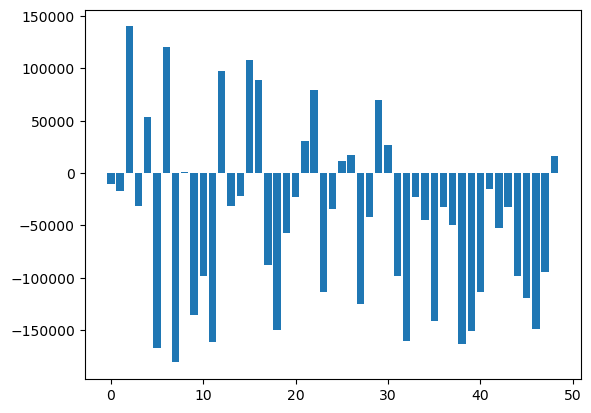

In [137]:
# get feature importance
importance = LR.coef_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

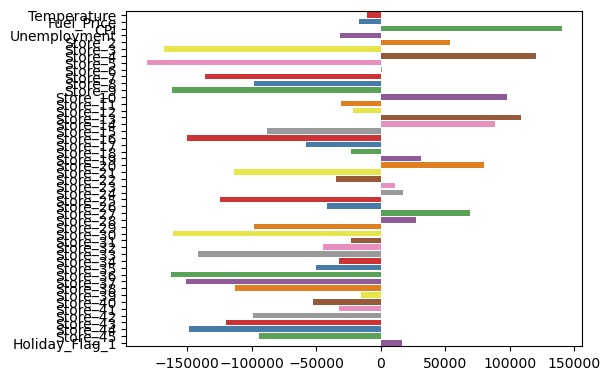

In [138]:
# Let us use the barplot to find the top variables that impact sales for walmart in Linear regression model 

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = x.columns, x= LR.coef_, palette='Set1')
plt.show()

#### Despite the residuals being almost normally distributed or there is no multicollinearity, the goodness of fit is not that satisfying. 

#### It is only 0.13 and 0.14. So, we have to look for other models to get better predictions for this problem. 

#### We can find that holiday flag feature has a greater impact in the walmart sales. 

#### As, tree models are good at predicting the sales for walmart, we move on to it. 

#### From, the linear regression model, the r2 score of train and test is more or less similar. 

#### This shows, there is no overfit. So, we don't employ ridge and lasso regression models. 

### Random Forest Regression 

In [139]:
from sklearn.model_selection import GridSearchCV

In [140]:
from sklearn.ensemble import RandomForestRegressor 

In [141]:
rf = RandomForestRegressor()

Feature 1: 0.002950494548183528
Feature 2: 0.003271468435095246
Feature 3: 0.007527506263928027
Feature 4: 0.0009015305826077145
Feature 5: 0.15524722372240166
Feature 6: 0.0
Feature 7: 0.21259684112185423
Feature 8: 0.0
Feature 9: 0.0
Feature 10: 0.0
Feature 11: 0.0
Feature 12: 0.0
Feature 13: 0.019856250080588507
Feature 14: 0.0
Feature 15: 0.0
Feature 16: 0.19270922543611702
Feature 17: 0.19894332475636545
Feature 18: 0.0
Feature 19: 0.0
Feature 20: 0.0
Feature 21: 0.0
Feature 22: 0.0
Feature 23: 0.20526918800096378
Feature 24: 0.0
Feature 25: 0.0
Feature 26: 0.0
Feature 27: 0.0
Feature 28: 0.0
Feature 29: 0.0
Feature 30: 0.0
Feature 31: 0.0
Feature 32: 0.0
Feature 33: 0.0
Feature 34: 0.0
Feature 35: 0.0
Feature 36: 0.0
Feature 37: 0.0
Feature 38: 0.0
Feature 39: 0.0
Feature 40: 0.0
Feature 41: 0.0
Feature 42: 0.0
Feature 43: 0.0
Feature 44: 0.0
Feature 45: 0.0
Feature 46: 0.0
Feature 47: 0.0
Feature 48: 0.0
Feature 49: 0.0007269470518949595


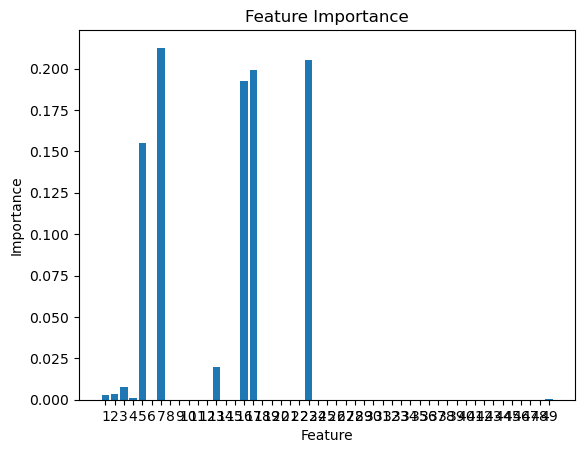

In [142]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

# Perform grid search using GridSearchCV
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

# Get the best estimator from grid search
best_rf = grid_search.best_estimator_

# Fit the best estimator on the data
best_rf.fit(x_train_scaled, y_train)

# Calculate feature importance
importance = best_rf.feature_importances_

# Print feature importance
for i, feature in enumerate(range(x_train_scaled.shape[1])):
    print(f"Feature {feature + 1}: {importance[i]}")

# Plot feature importance
plt.bar(range(x_train_scaled.shape[1]), importance)
plt.xticks(range(x_train_scaled.shape[1]), range(1, x_train_scaled.shape[1] + 1))
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.show()








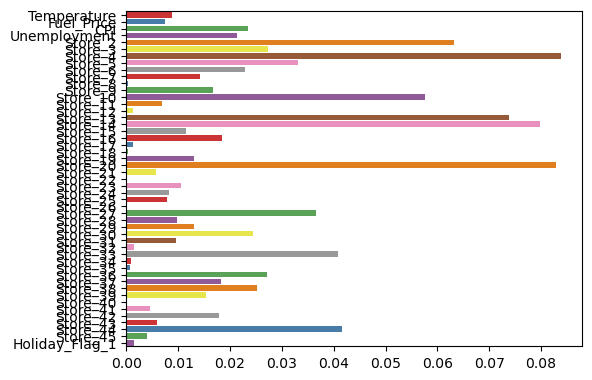

In [206]:
# Let us use the barplot to find the top variables that affect the target variable Sales in random forest regression 


plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = x.columns, x= importance, palette='Set1')
plt.show()

In [144]:
y_pred = best_rf.predict(x_test_scaled)

In [145]:
y_predtrain = best_rf.predict(x_train_scaled)

In [146]:
r2 = r2_score(y_test, y_pred)
r2

0.38814447898995097

In [147]:
# Calculate RMSE, MSE, and MAE for test data
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
mse = metrics.mean_squared_error(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)

# Print evaluation scores
print("R-squared Score: ", r2)
print("RMSE: ", rmse)
print("MSE: ", mse)
print("MAE: ", mae)

R-squared Score:  0.38814447898995097
RMSE:  438183.79369523557
MSE:  192005037057.14874
MAE:  360194.87900103227


In [148]:
# Calculate RMSE, MSE, and MAE for training data
rmse = np.sqrt(metrics.mean_squared_error(y_train, y_predtrain))
mse = metrics.mean_squared_error(y_train, y_predtrain)
mae = metrics.mean_absolute_error(y_train, y_predtrain)

# Print evaluation scores
print("R-squared Score: ", r2)
print("RMSE: ", rmse)
print("MSE: ", mse)
print("MAE: ", mae)

R-squared Score:  0.38814447898995097
RMSE:  428104.3488075443
MSE:  183273333467.93152
MAE:  348463.01437257405


### Gradient Boosting Algorithm 

In [149]:
from sklearn.ensemble import GradientBoostingRegressor

In [150]:
# Define the gradient boosting regressor
gb = GradientBoostingRegressor()

In [151]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

In [152]:
# Perform grid search using GridSearchCV
grid_search = GridSearchCV(gb, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train_scaled, y_train)

# Get the best estimator from grid search
best_gb = grid_search.best_estimator_
best_gb

GradientBoostingRegressor(max_depth=5, min_samples_leaf=5, n_estimators=150)

Feature 1: 0.00878309367356572
Feature 2: 0.007477354418799085
Feature 3: 0.023418338035337955
Feature 4: 0.021256683110616494
Feature 5: 0.06324908416289778
Feature 6: 0.027342033993219394
Feature 7: 0.08377697784075526
Feature 8: 0.03300498577515762
Feature 9: 0.02285939689952747
Feature 10: 0.01424720055374402
Feature 11: 0.00023940170171030318
Feature 12: 0.01665675427591994
Feature 13: 0.05769162874179187
Feature 14: 0.006871354063133746
Feature 15: 0.0012946085512082427
Feature 16: 0.07384777531479104
Feature 17: 0.07979451880808348
Feature 18: 0.011492688007093068
Feature 19: 0.018409153148862954
Feature 20: 0.0013118766923355327
Feature 21: 0.00020410325662212578
Feature 22: 0.012996580653713345
Feature 23: 0.08281898560620403
Feature 24: 0.005742813901247382
Feature 25: 0.0
Feature 26: 0.010507004359565222
Feature 27: 0.008138582087155026
Feature 28: 0.00786993072745543
Feature 29: 0.0001624314475868744
Feature 30: 0.03665097202827688
Feature 31: 0.009654929862420608
Feature 3

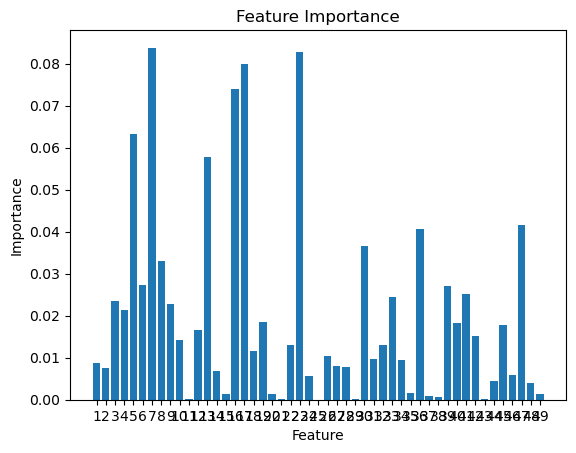

R-squared Score:  0.9248564176730856
RMSE:  153559.89877225508
MSE:  23580642510.94523
MAE:  95044.01228108867


In [153]:
# Fit the best estimator on the training data
best_gb.fit(x_train_scaled, y_train)

# Make predictions on the test set
y_pred = best_gb.predict(x_test_scaled)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)

# Calculate RMSE, MSE, and MAE
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
mse = metrics.mean_squared_error(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)

# Calculate feature importance
importance = best_gb.feature_importances_

# Print feature importance
for i, feature in enumerate(range(x_train_scaled.shape[1])):
    print(f"Feature {feature + 1}: {importance[i]}")
    
# Plot feature importance
plt.bar(range(x_train_scaled.shape[1]), importance)
plt.xticks(range(x_train_scaled.shape[1]), range(1, x_train_scaled.shape[1] + 1))
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.show()

# Print evaluation scores
print("R-squared Score: ", r2)
print("RMSE: ", rmse)
print("MSE: ", mse)
print("MAE: ", mae)


In [154]:
y_pred_training = best_gb.predict(x_train_scaled)

In [155]:
# Calculate R-squared score
r2 = r2_score(y_train, y_pred_training)

# Calculate RMSE, MSE, and MAE
rmse = np.sqrt(metrics.mean_squared_error(y_train, y_pred_training))
mse = metrics.mean_squared_error(y_train, y_pred_training)
mae = metrics.mean_absolute_error(y_train, y_pred_training)

# Print evaluation scores
print("R-squared Score: ", r2)
print("RMSE: ", rmse)
print("MSE: ", mse)
print("MAE: ", mae)


R-squared Score:  0.9434907390201217
RMSE:  132164.38603709792
MSE:  17467424936.56304
MAE:  83899.30971624717


In [156]:
y_test.describe()

count    1.931000e+03
mean     1.050512e+06
std      5.603306e+05
min      2.099862e+05
25%      5.579893e+05
50%      9.693875e+05
75%      1.425581e+06
max      2.720371e+06
Name: Weekly_Sales, dtype: float64

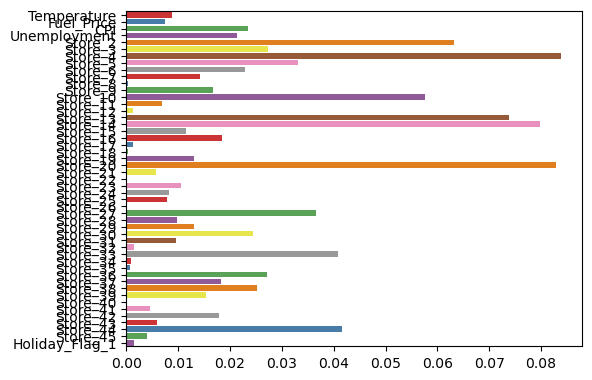

In [157]:
# Let us use the barplot to find the top variables that impact walmart sales in gradient boosting regression model 

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = x.columns, x= importance, palette='Set1')
plt.show()

## XG Boost Regression

In [161]:
import xgboost as xgb

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [162]:
# XGBoost regression model
xgb_model = xgb.XGBRegressor()

# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

Mean Squared Error (MSE): 13111166403.548388
Mean Absolute Error (MAE): 66286.31399372086
R-squared (R2): 0.9582191192801633


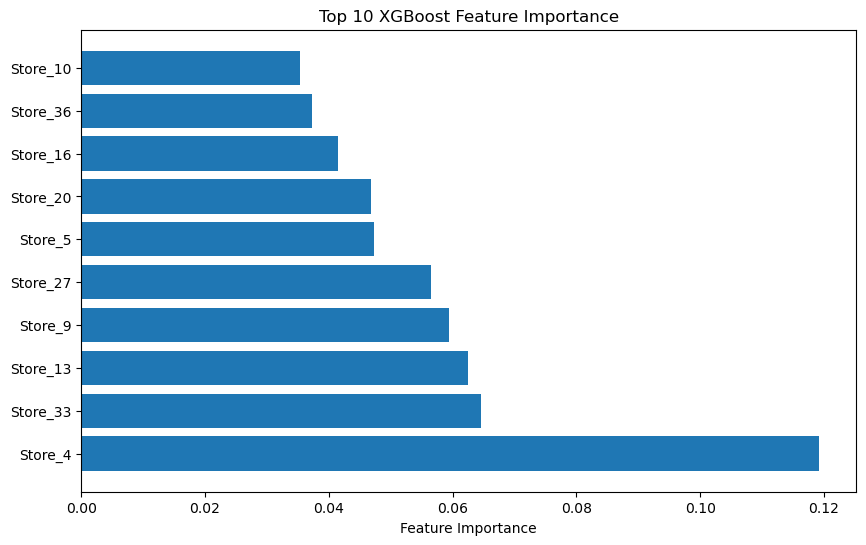

In [204]:
# Create GridSearchCV object and fit it to the data
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train_scaled, y_train)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(x_test_scaled)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

# Feature importance graph
feature_importance = best_model.feature_importances_
feature_names = x.columns

# Sort features based on importance
sorted_idx = feature_importance.argsort()[::-1]

# Get the top 10 feature names and importance values
top_10_feature_names = [feature_names[i] for i in sorted_idx[:10]]
top_10_feature_importance = feature_importance[sorted_idx[:10]]

# Plot the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_10_feature_names)), top_10_feature_importance, align='center')
plt.yticks(range(len(top_10_feature_names)), top_10_feature_names)
plt.xlabel('Feature Importance')
plt.title('Top 10 XGBoost Feature Importance')
plt.show()



In [186]:
abc = pd.DataFrame(feature_importance, x.columns)

abc.rename(columns = {0:"Feature_Importance"}, inplace = True)



In [188]:
abc.sort_values(ascending = False, by = "Feature_Importance")

,Feature_Importance
Store_4,0.119243
Store_33,0.064568
Store_13,0.062421
Store_9,0.059398
Store_27,0.056535
Store_5,0.047359
Store_20,0.046806
Store_16,0.041445
Store_36,0.037298
Store_10,0.035343


## The top 10 features according to their importances from XG Boost regression model are 

- Store_4	
- Store_33	
- Store_13	
- Store_9	
- Store_27	
- Store_5	
- Store_20	
- Store_16	
- Store_36	
- Store_10	

## Ridge Regression 

In [189]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [190]:
# list pf alphas

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(x_train_scaled, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [191]:
# Printing the best hyperparameter alpha 

print(ridge_model_cv.best_params_)

{'alpha': 0.0001}


In [192]:
#Fitting Ridge model for alpha = 9 and printing coefficients which have been penalised
alpha = 0.0001
ridge = Ridge(alpha=alpha)

ridge.fit(x_train_scaled, y_train)
print(ridge.coef_)

[ -10897.21098334  -17126.85873309  140039.20475044  -31367.48338415
   53357.36945283 -167650.09181705  120213.60958627 -181031.62228539
    1067.01615366 -135897.15108259  -98458.61392461 -161490.82261259
   97931.13852044  -31256.18340765  -21736.61427621  108366.50675472
   88777.17821454  -88054.2386231  -149964.21159955  -57619.15622547
  -22866.68654525   30924.95055667   79612.70965984 -113752.96378049
  -34622.79031942   11316.9901161    17138.71076035 -125009.82192935
  -41739.51754264   69323.67638906   26937.47704267  -98085.13597311
 -160774.54319266  -22948.50538872  -44677.38829529 -141729.14081972
  -32613.68842535  -50044.73843376 -162962.72482829 -151229.42256988
 -113234.76165897  -15295.73420054  -52673.60543274  -32801.54957516
  -98741.57369582 -119878.25416583 -149001.00591913  -94742.59705578
   16180.67856484]


In [194]:
# Let us put the features and coefficients in a table 

ridge_df = pd.DataFrame({'Features':x_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,Temperature,-10897.2110
1,Fuel_Price,-17126.8587
2,CPI,140039.2048
3,Unemployment,-31367.4834
4,Store_2,53357.3695
5,Store_3,-167650.0918
6,Store_4,120213.6096
7,Store_5,-181031.6223
8,Store_6,1067.0162
9,Store_7,-135897.1511


In [195]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(x_train_scaled)
y_pred_test = ridge.predict(x_test_scaled)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2_train_lr =", r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test_lr =", r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("rss1_lr =",rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("rss2_lr = ", rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("mse_train_lr = ", mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("mse_test_lr = ", mse_test_lr)
metric2.append(mse_test_lr**0.5)

r2_train_lr = 0.9314861747609737
r2_test_lr = 0.9304859631148459
rss1_lr = 95386267570813.89
rss2_lr =  42122925184960.516
mse_train_lr =  21178123350.535942
mse_test_lr =  21814047221.626366


In [196]:
ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = x_train.columns))
ridge_coeff_dict

{'Temperature': -10897.211,
 'Fuel_Price': -17126.8587,
 'CPI': 140039.2048,
 'Unemployment': -31367.4834,
 'Store_2': 53357.3695,
 'Store_3': -167650.0918,
 'Store_4': 120213.6096,
 'Store_5': -181031.6223,
 'Store_6': 1067.0162,
 'Store_7': -135897.1511,
 'Store_8': -98458.6139,
 'Store_9': -161490.8226,
 'Store_10': 97931.1385,
 'Store_11': -31256.1834,
 'Store_12': -21736.6143,
 'Store_13': 108366.5068,
 'Store_14': 88777.1782,
 'Store_15': -88054.2386,
 'Store_16': -149964.2116,
 'Store_17': -57619.1562,
 'Store_18': -22866.6865,
 'Store_19': 30924.9506,
 'Store_20': 79612.7097,
 'Store_21': -113752.9638,
 'Store_22': -34622.7903,
 'Store_23': 11316.9901,
 'Store_24': 17138.7108,
 'Store_25': -125009.8219,
 'Store_26': -41739.5175,
 'Store_27': 69323.6764,
 'Store_28': 26937.477,
 'Store_29': -98085.136,
 'Store_30': -160774.5432,
 'Store_31': -22948.5054,
 'Store_32': -44677.3883,
 'Store_33': -141729.1408,
 'Store_34': -32613.6884,
 'Store_35': -50044.7384,
 'Store_36': -162962.

## Finding the top 10 variables that affect the Sales Price according to the Ridge regression model 

In [198]:
from sklearn.feature_selection import RFE


In [200]:
# Do an RFE to minimise the features to 15
x_train_ridge = x_train[ridge_df.Features]

lm = LinearRegression()
lm.fit(x_train_ridge, y_train)

# running RFE
rfe = RFE(lm, n_features_to_select = 15)            
rfe = rfe.fit(x_train_ridge, y_train)

In [201]:
# Method to get the coefficient values

def find(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp1_df = pd.DataFrame(list(zip( x_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp1_df = temp1_df.loc[temp1_df['rfe_support'] == True]
temp1_df.reset_index(drop=True, inplace=True)

temp1_df['Coefficient'] = temp1_df['Features'].apply(find)
temp1_df = temp1_df.sort_values(by=['Coefficient'], ascending=False)
temp1_df = temp1_df.head(10)
temp1_df

,Features,rfe_support,rfe_ranking,Coefficient
2,Store_4,True,1,120213.6096
5,Store_13,True,1,108366.5068
4,Store_10,True,1,97931.1385
6,Store_14,True,1,88777.1782
7,Store_20,True,1,79612.7097
8,Store_27,True,1,69323.6764
0,Store_2,True,1,53357.3695
13,Store_38,True,1,-113234.7617
10,Store_33,True,1,-141729.1408
14,Store_44,True,1,-149001.0059


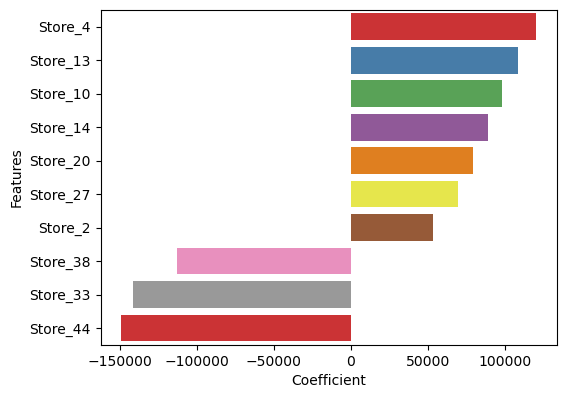

In [202]:
# Let us use the barplot to find the top 10 variables that affect the Sales price in ridge regression model 

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp1_df)
plt.show()


## We can find that the top features that rank in this ridge regression are


- Store 4
- Store 13
- Store 10
- Store 14
- Store 20
- Store 27
- Store 2

## Lasso Regression 

In [207]:
lasso = Lasso()

# cross validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(x_train_scaled, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [208]:
# Let us find the best hyperparameter alpha 

print(lasso_model_cv.best_params_)

{'alpha': 0.0001}


In [209]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(x_train_scaled, y_train) 

Lasso(alpha=0.0001)

In [210]:
lasso.coef_

array([ -10890.08765876,  -17574.99631796,  149324.81468748,
        -30546.85847816,   53407.77683529, -167685.97758235,
        123478.13101755, -180912.40312686,    1138.18136397,
       -135122.58157715,  -98404.79946509, -161445.40423135,
        100959.8875463 ,  -31297.33078915,  -18753.62472783,
        111554.62195569,   89834.12165928,  -85329.11302014,
       -149003.30142747,  -54395.22225719,  -20098.15497426,
         33697.65344448,   79935.36793333, -113696.49837826,
        -31925.90702823,   14464.94194669,   20002.07571425,
       -124661.82443229,  -38729.03713971,   71905.25977956,
         29797.88405211,  -95394.44498247, -160721.37606871,
        -22885.29526837,  -43916.601288  , -138606.87947044,
        -29772.30251923,  -47272.19558938, -162894.2487999 ,
       -151160.71067024, -110376.17575579,  -15226.18972889,
        -49572.78787414,  -31949.69768157,  -95607.99875167,
       -119736.17502968, -145669.01173931,  -93708.82736261,
         16151.43147113]

In [211]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(x_train_scaled)
y_pred_test = lasso.predict(x_test_scaled)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2_train_lr =", r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test_lr =", r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("rss1_lr =",rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("rss2_lr = ", rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("mse_train_lr = ", mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("mse_test_lr = ", mse_test_lr)
metric3.append(mse_test_lr**0.5)

r2_train_lr = 0.9314855531062392
r2_test_lr = 0.9304635843547207
rss1_lr = 95387133050512.92
rss2_lr =  42136485882637.25
mse_train_lr =  21178315508.550827
mse_test_lr =  21821069851.18449


In [212]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':x_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,Temperature,-10890.0877
1,Fuel_Price,-17574.9963
2,CPI,149324.8147
3,Unemployment,-30546.8585
4,Store_2,53407.7768
5,Store_3,-167685.9776
6,Store_4,123478.1310
7,Store_5,-180912.4031
8,Store_6,1138.1814
9,Store_7,-135122.5816


In [213]:
# Put the Features and Coefficients in dictionary

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = x_train.columns))
lasso_coeff_dict

{'Temperature': -10890.087658761273,
 'Fuel_Price': -17574.99631795979,
 'CPI': 149324.814687476,
 'Unemployment': -30546.858478159465,
 'Store_2': 53407.776835294426,
 'Store_3': -167685.97758234572,
 'Store_4': 123478.13101755021,
 'Store_5': -180912.4031268561,
 'Store_6': 1138.1813639681418,
 'Store_7': -135122.58157714654,
 'Store_8': -98404.7994650887,
 'Store_9': -161445.40423135014,
 'Store_10': 100959.88754630207,
 'Store_11': -31297.33078914905,
 'Store_12': -18753.624727829556,
 'Store_13': 111554.6219556867,
 'Store_14': 89834.1216592793,
 'Store_15': -85329.11302014321,
 'Store_16': -149003.30142747378,
 'Store_17': -54395.22225719238,
 'Store_18': -20098.15497425832,
 'Store_19': 33697.6534444833,
 'Store_20': 79935.36793333427,
 'Store_21': -113696.49837825929,
 'Store_22': -31925.907028233323,
 'Store_23': 14464.941946686575,
 'Store_24': 20002.075714248105,
 'Store_25': -124661.82443228581,
 'Store_26': -38729.03713971049,
 'Store_27': 71905.2597795571,
 'Store_28': 29

In [215]:
# Do an RFE to minimise the features to 15

x_train_lasso = x_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(x_train_lasso, y_train)

# running RFE

rfe = RFE(lm, n_features_to_select=15)            
rfe = rfe.fit(x_train_lasso, y_train)

In [216]:
# Method to get the coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp2_df = pd.DataFrame(list(zip( x_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df = temp2_df.head(10)
temp2_df

,Features,rfe_support,rfe_ranking,Coefficient
2,Store_4,True,1,123478.131018
5,Store_13,True,1,111554.621956
4,Store_10,True,1,100959.887546
6,Store_14,True,1,89834.121659
7,Store_20,True,1,79935.367933
8,Store_27,True,1,71905.259780
0,Store_2,True,1,53407.776835
13,Store_38,True,1,-110376.175756
10,Store_33,True,1,-138606.879470
14,Store_44,True,1,-145669.011739


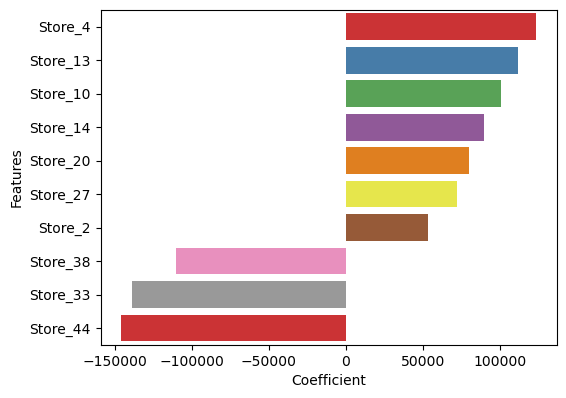

In [217]:
# Let us use barplot to visualize the top 10 variables the affect Sales price in Lasso regression model

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp2_df)
plt.show()

## Top variables that affect the weekly sales of a store according to Lasso regression model

- Store 4
- Store 13
- Store 10
- Store 14
- Store 20
- Store 27
- Store 2

## Suggestions and Recommendations 

1. Though Linear regression, ridge regression, lasso regression and simple gradient boosting regression performed really well, it was XG Boost regression that stood out from all with a score of 0.958 r2 score. Also, its RMSE is lower than any other model built

## Time Series Analysis and Forecasting

In [218]:
df_walmart = walmart.groupby("Date")["Weekly_Sales"].sum()
df_walmart

Date
2010-01-10    42239875.87
2010-02-04    50423831.26
2010-02-07    48917484.50
2010-02-19    48276993.78
2010-02-26    43968571.13
                 ...     
2012-10-08    47403451.04
2012-10-19    45122410.57
2012-10-26    45544116.29
2012-11-05    46925878.99
2012-12-10    46128514.25
Name: Weekly_Sales, Length: 143, dtype: float64

<Figure size 1800x1000 with 0 Axes>

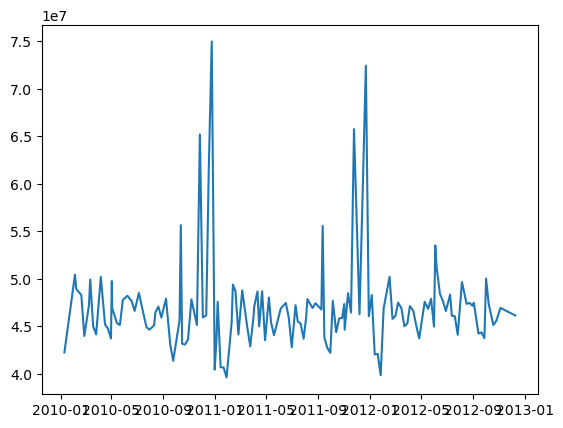

<Figure size 1800x1000 with 0 Axes>

In [219]:
plt.plot(df_walmart)

plt.figure(figsize=(18,10))

#### We can see some kind of seasonality in this data. But let's try to catch the monthly performance of all stores for 2010, 2011 and 2012

In [220]:
df1_walmart = walmart.groupby("month")["Weekly_Sales"].sum()
df1_walmart

month
April        6.453239e+08
August       5.642317e+08
December     5.881230e+08
February     5.220257e+08
January      4.264263e+08
July         5.933139e+08
June         5.750180e+08
March        5.534864e+08
May          6.056966e+08
November     4.576982e+08
October      6.028871e+08
September    5.905323e+08
Name: Weekly_Sales, dtype: float64

In [221]:
df2 = pd.DataFrame(df1_walmart)

df2.reset_index(inplace=True)

In [222]:
df2

,month,Weekly_Sales
0,April,6.453239e+08
1,August,5.642317e+08
2,December,5.881230e+08
3,February,5.220257e+08
4,January,4.264263e+08
5,July,5.933139e+08
6,June,5.750180e+08
7,March,5.534864e+08
8,May,6.056966e+08
9,November,4.576982e+08


In [223]:
sort_order=['January','February','March','April','May','June','July','August','September','October','November','December']
df2.index=pd.CategoricalIndex(df2['month'],categories=sort_order,ordered=True)
df2=df2.sort_index().reset_index(drop=True)

In [224]:
df2

,month,Weekly_Sales
0,January,4.264263e+08
1,February,5.220257e+08
2,March,5.534864e+08
3,April,6.453239e+08
4,May,6.056966e+08
5,June,5.750180e+08
6,July,5.933139e+08
7,August,5.642317e+08
8,September,5.905323e+08
9,October,6.028871e+08


In [225]:
df2 = df2.set_index("month")

In [226]:
df2

,Weekly_Sales
month,
January,4.264263e+08
February,5.220257e+08
March,5.534864e+08
April,6.453239e+08
May,6.056966e+08
June,5.750180e+08
July,5.933139e+08
August,5.642317e+08
September,5.905323e+08


<Figure size 1800x1000 with 0 Axes>

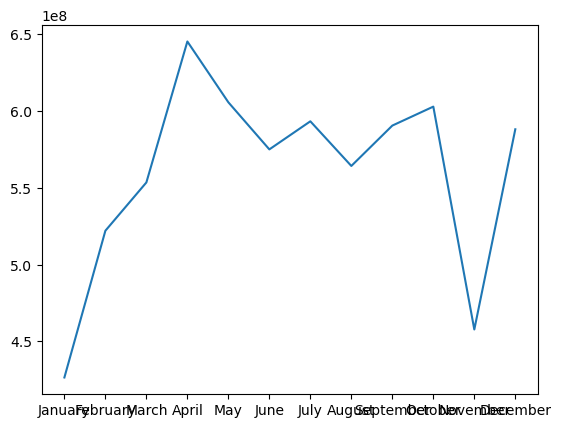

<Figure size 1800x1000 with 0 Axes>

In [227]:
plt.plot(df2)
plt.figure(figsize = (18,10))

#### We are able to see that sales for all 45 Walmart stores spikes four times in a year. They are April, July, October and December.


#### Also, there is a fall in Walmart sales during June, August, November and January. 


#### There is a huge level of upward trend in sales from Jan to April and from November to December

# Let's do some predictions with a time series model named Holt Winters Exponential Smoothing

#### We are using the Holt Winters Exponential Smoothing to predict the time series with seasonality really well. 

#### As retail is one of the segments with more seasonality, it's necessary to go with a model that predicts seasonality and trend

In [228]:
my_df = pd.DataFrame(df_walmart)

my_df

,Weekly_Sales
Date,
2010-01-10,42239875.87
2010-02-04,50423831.26
2010-02-07,48917484.50
2010-02-19,48276993.78
2010-02-26,43968571.13
...,...
2012-10-08,47403451.04
2012-10-19,45122410.57
2012-10-26,45544116.29


In [229]:
my_df.reset_index(inplace=True)

In [230]:
my_df

,Date,Weekly_Sales
0,2010-01-10,42239875.87
1,2010-02-04,50423831.26
2,2010-02-07,48917484.50
3,2010-02-19,48276993.78
4,2010-02-26,43968571.13
...,...,...
138,2012-10-08,47403451.04
139,2012-10-19,45122410.57
140,2012-10-26,45544116.29
141,2012-11-05,46925878.99


In [231]:
my_df["Date"] = pd.to_datetime(my_df["Date"], format = "%Y-%m")

In [232]:
my_df

,Date,Weekly_Sales
0,2010-01-10,42239875.87
1,2010-02-04,50423831.26
2,2010-02-07,48917484.50
3,2010-02-19,48276993.78
4,2010-02-26,43968571.13
...,...,...
138,2012-10-08,47403451.04
139,2012-10-19,45122410.57
140,2012-10-26,45544116.29
141,2012-11-05,46925878.99


In [233]:
my_df = my_df.set_index("Date")

In [234]:
my_df

,Weekly_Sales
Date,
2010-01-10,42239875.87
2010-02-04,50423831.26
2010-02-07,48917484.50
2010-02-19,48276993.78
2010-02-26,43968571.13
...,...
2012-10-08,47403451.04
2012-10-19,45122410.57
2012-10-26,45544116.29


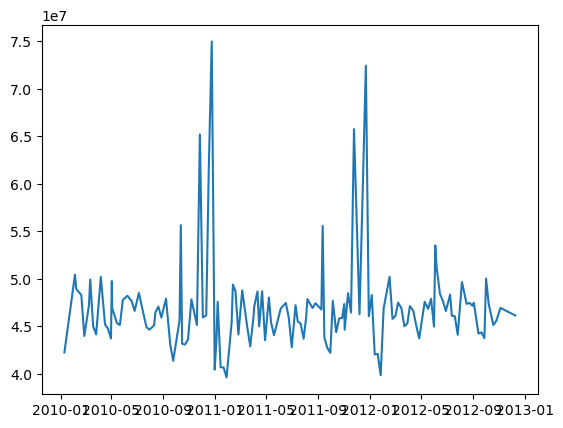

In [235]:
plt.plot(my_df)

In [236]:
my_df["Weekly_Sales"].ndim

1

In [237]:
## Let's decompose this time series to see if it has a trend or seasonality in it

In [238]:
import statsmodels.api as sm

In [239]:
from pylab import rcParams

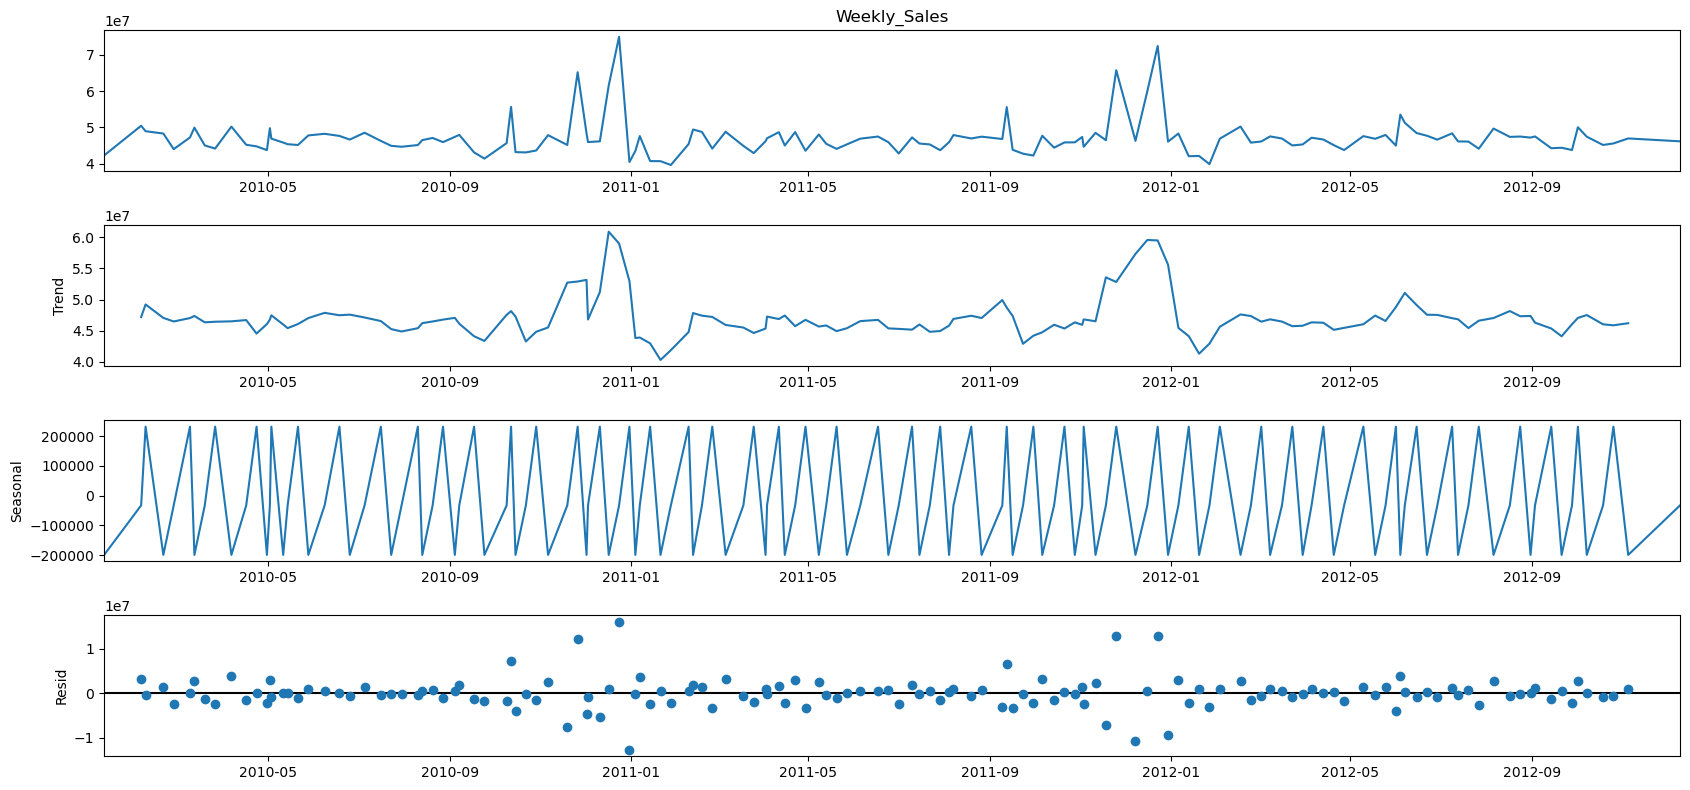

In [240]:
plt.rcParams['figure.figsize'] = (17,8)

decomposition = sm.tsa.seasonal_decompose(my_df["Weekly_Sales"], model = "additive", period = 3)
decomposition.plot()

plt.show()

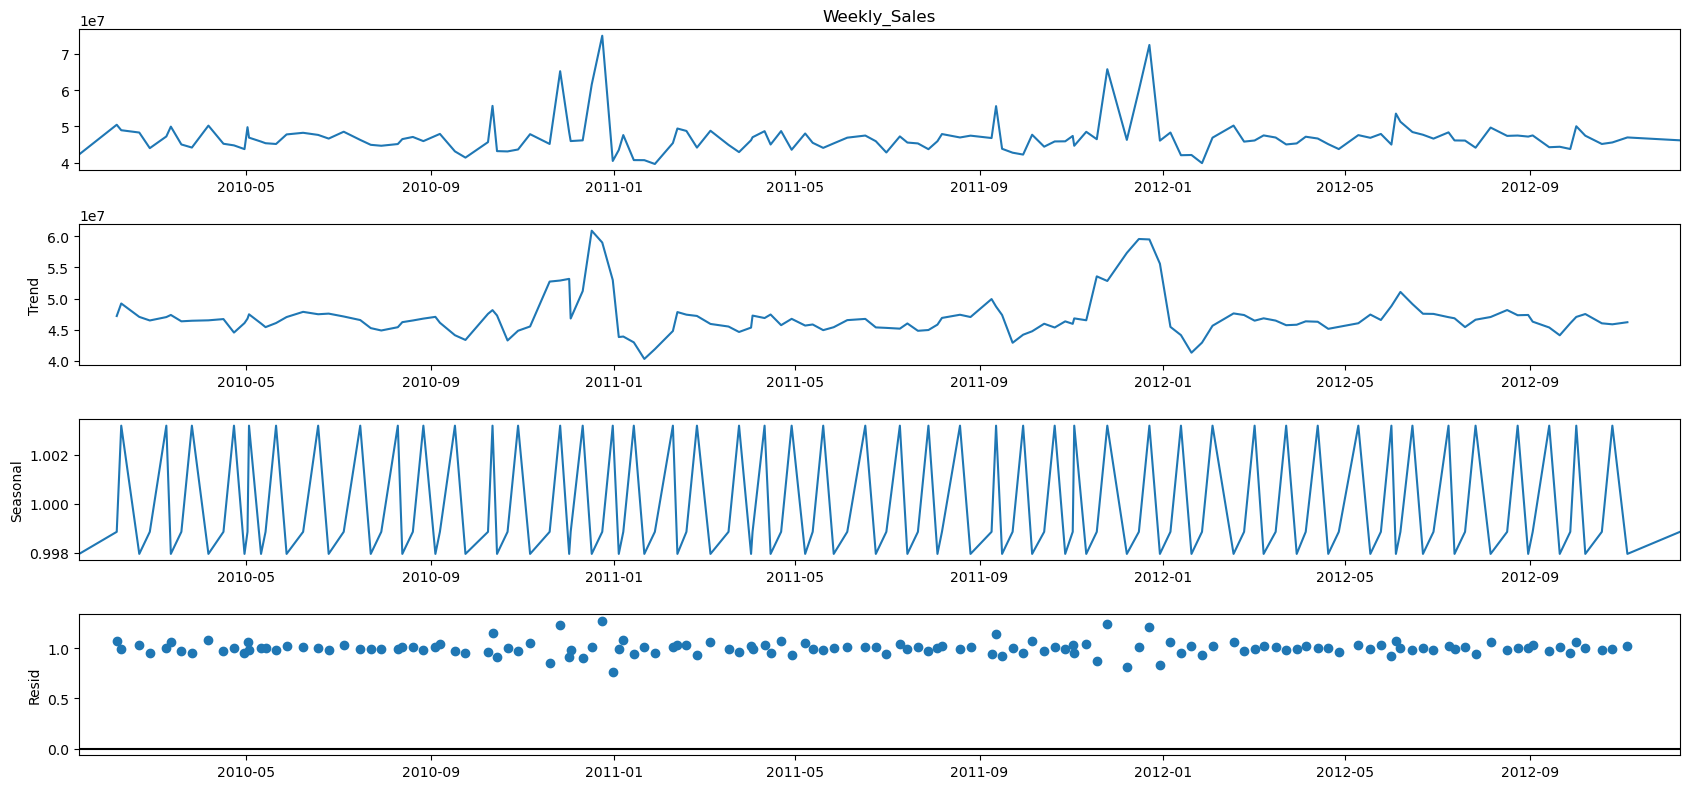

In [241]:
plt.rcParams['figure.figsize'] = (17,8)

decomposition = sm.tsa.seasonal_decompose(my_df["Weekly_Sales"], model = "multiplicative", period = 3)
decomposition.plot()

plt.show()

#### What's evident in decomposing the time series is that we can see that there is a high amount of seasonality in this data

In [242]:
## let's check if the time series is stationary or not 

# Augmented Dickey-Fuller Test for Stationarity
Augmented Dickey Fuller test (ADF Test) is a common statistical test used to test whether a given Time series is stationary or not. It is one of the most commonly used statistical test when it comes to analyzing the stationary of a series.

* Null Hypothesis (H0):  The time series is not stationary.

* Alternate Hypothesis (H1): The time series is stationary.


--------------------------------------------------------------------------------------------------------------------------------

* p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
* p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [243]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(my_df['Weekly_Sales'], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[2]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')  

ADF Statistic: -9.797935910800264
n_lags: 0
p-value: 6.103232960980554e-17
Critial Values:
   1%, -3.477261624048995
Critial Values:
   5%, -2.8821181874544233
Critial Values:
   10%, -2.5777431104939494


#### As p-value is less than 0.05 in ADF, we can conclude that this time series data is stationary

# Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test
The Kwiatkowski–Phillips–Schmidt–Shin (KPSS) test figures out if a time series is stationary around a mean or linear trend, or is non-stationary due to a unit root. A stationary time series is one where statistical properties — like the mean and variance — are constant over time.

* Null Hypothesis: The time series is stationary.

* Alternate Hypothesis: The time series is not stationary.

--------------------------------------------------------------------------------------------------------------------------------

For KPSS test,

* The Null Hypothesis : The series is stationary when p-value >0.05

* Alternate Hypothesis: The series is not stationary when p-value <= 0.05

In [244]:
#loading kpss from statsmodel
from statsmodels.tsa.stattools import kpss

result = kpss(my_df['Weekly_Sales'])
print(f'KPSS Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'num lags: {result[2]}')
print('Critial Values:')
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')  

KPSS Statistic: 0.045534869048159045
p-value: 0.1
num lags: 3
Critial Values:
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


C:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


#### As p-value is greater than 0.05, we can conclude that the data is stationary. So, there is no need to difference or transform this data. We can get into a model that predicts this time series with seasonality. The best model for this would be Holt Winters Exponential Smoothing. Let's first split the data and carry out this forecasting. 

In [245]:
## Splitting the data 

length_train = 115

train = my_df.iloc[:length_train, : ]
test = my_df.iloc[length_train: , : ]

In [246]:
train

,Weekly_Sales
Date,
2010-01-10,42239875.87
2010-02-04,50423831.26
2010-02-07,48917484.50
2010-02-19,48276993.78
2010-02-26,43968571.13
...,...
2012-03-23,44993794.45
2012-03-30,45272862.02
2012-04-05,47124197.93


<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

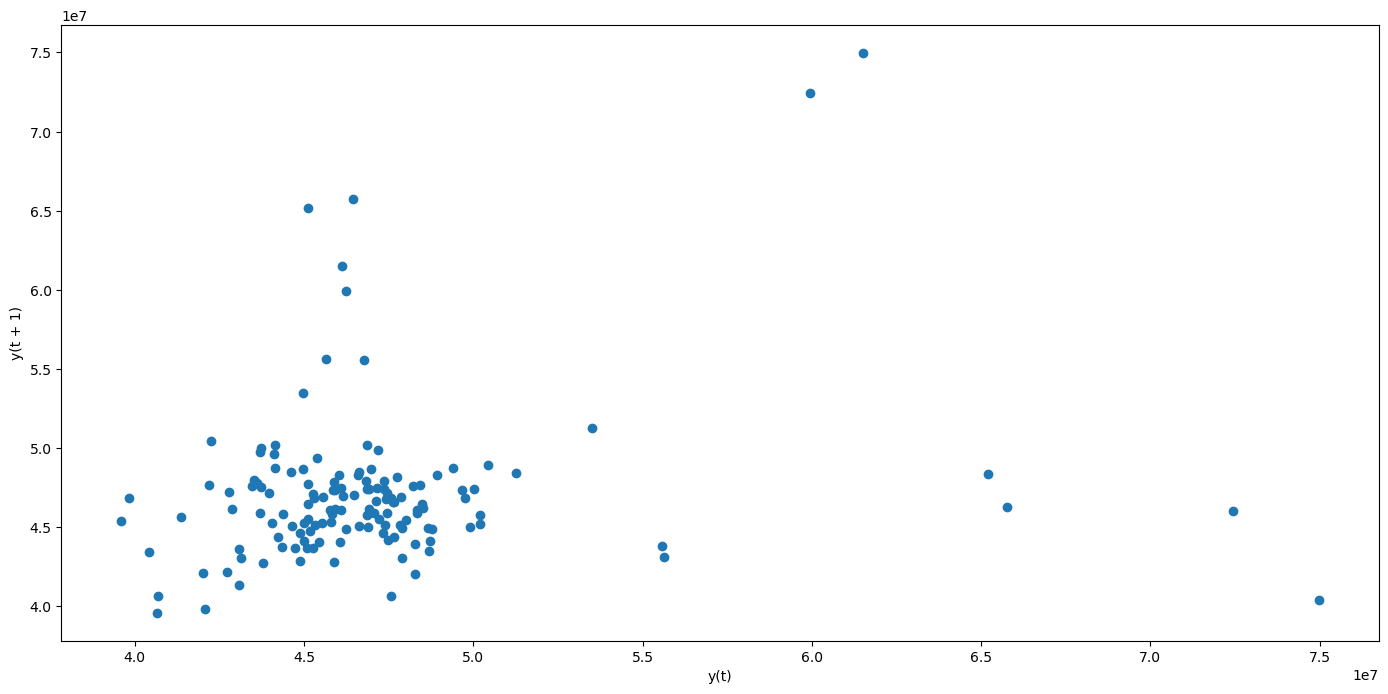

In [247]:
## Let us check a lag plot for this data

from pandas.plotting import lag_plot

lag_plot(my_df["Weekly_Sales"])

In [248]:
## We can see some Autocorrelation in this dataset. 

<Axes: xlabel='Date'>

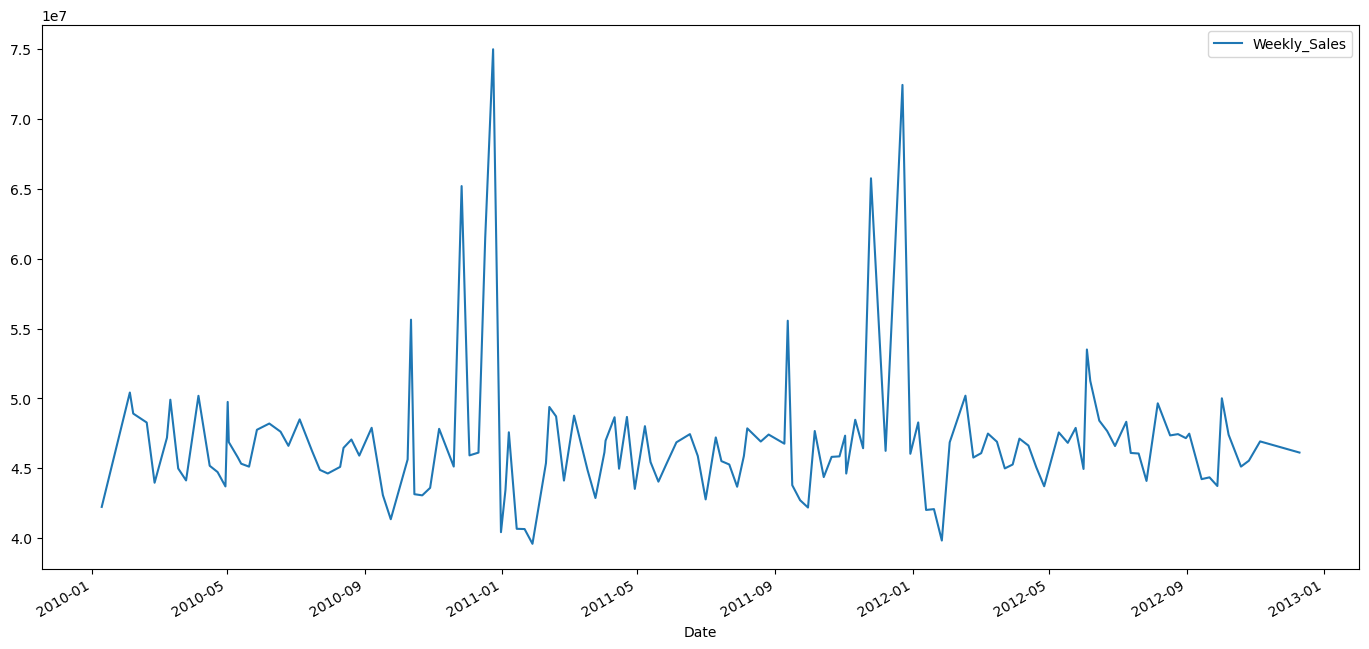

In [249]:
my_df.plot()

In [250]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing


In [251]:
fitted_model =  ExponentialSmoothing(train['Weekly_Sales'], trend = 'mul', seasonal='mul', seasonal_periods= 6).fit()

C:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [252]:
test_predictions = fitted_model.forecast(28)

C:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [253]:
test_predictions

115    4.783051e+07
116    4.680987e+07
117    4.830517e+07
118    4.638067e+07
119    4.664353e+07
120    4.750334e+07
121    4.782438e+07
122    4.680387e+07
123    4.829898e+07
124    4.637472e+07
125    4.663755e+07
126    4.749725e+07
127    4.781825e+07
128    4.679787e+07
129    4.829279e+07
130    4.636878e+07
131    4.663157e+07
132    4.749117e+07
133    4.781212e+07
134    4.679188e+07
135    4.828660e+07
136    4.636284e+07
137    4.662560e+07
138    4.748508e+07
139    4.780600e+07
140    4.678588e+07
141    4.828042e+07
142    4.635690e+07
dtype: float64

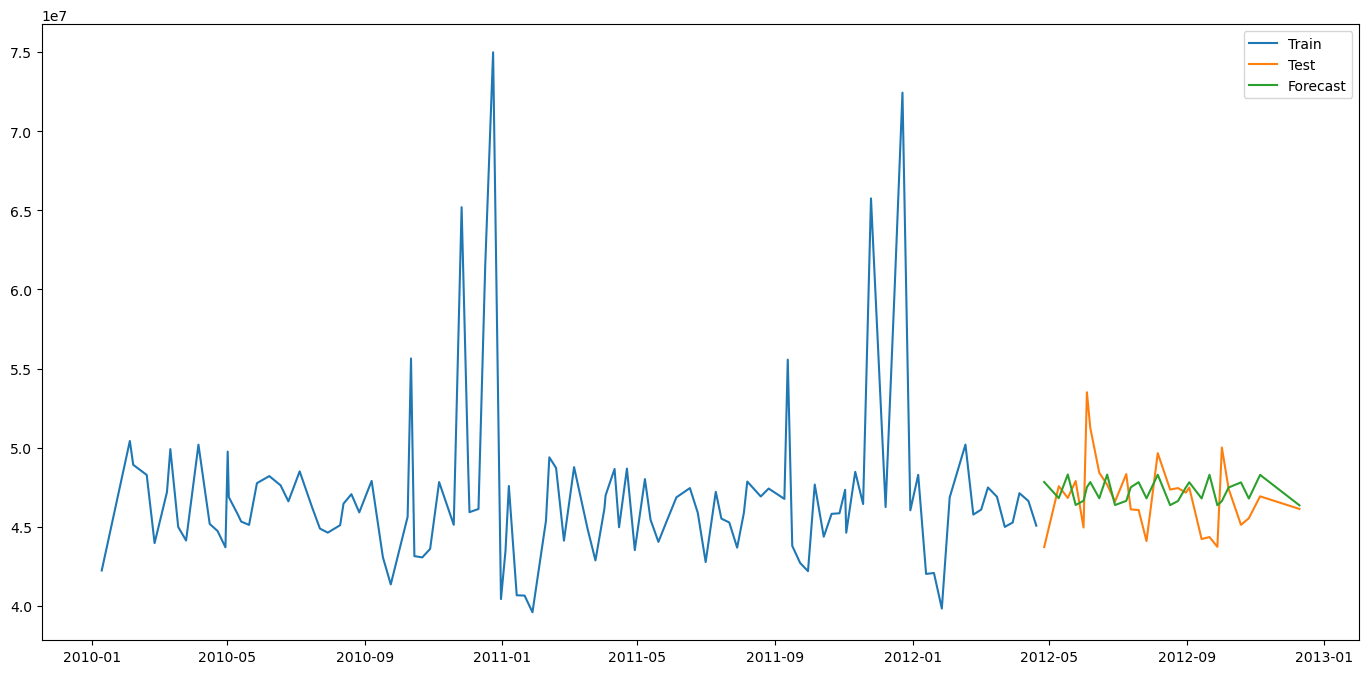

In [254]:
plt.plot(train["Weekly_Sales"], label = "Train")
plt.plot(test["Weekly_Sales"], label = "Test")
plt.plot(test.index, test_predictions, label = "Forecast")

plt.legend()

In [255]:
## Evaluating this time series model 

In [256]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [257]:
mean_absolute_error(test, test_predictions)

1818305.519784473

In [258]:
mean_squared_error(test, test_predictions)

5198081275677.671

In [259]:
np.sqrt(mean_squared_error(test, test_predictions))

2279930.1032438846

In [260]:
test.describe()

,Weekly_Sales
count,2.800000e+01
mean,4.698275e+07
std,2.273486e+06
min,4.371680e+07
25%,4.543869e+07
50%,4.704276e+07
75%,4.772433e+07
max,5.350232e+07


#### As the seasonal periods of 6 months have an RMSE that's closer to Standard deviation of actual y-values, we would go with this Holt winters prediction model that predicts the seasonality effectively compared to seasonality with 3 months, 9 months and 12 months. 

## Findings and recommendations 


1. As Thursday is the highest in terms of day-based sales, Thursday is the best day in the week for providing added discounts and promotions

2. With April topping in sales of all stores, April is the best month for providing any discounts or coupons. Not just during April, during July, October, and December, Walmart needs to stock items as there might be a rise in demand during these times. Also, there is a fall in Walmart sales during June, August, November and January. These are the times when the stock needs to be kept lesser as the sales might fall. 
  

3. 41st week that is first and second week of October is the best time for any weekly discounts offered to customers. Also, walmart needs to stock more during this time as it is the start of Holiday season sales like Single's day. 

4. 2011 had the highest sales among all the three years

5. As most sales occur during the non-holiday weeks, Walmart must keep its stock reserved for these times than the holiday week



#### The 17th, 41st, 19th, 37th, 28th, 1st and 15th - All these weeks had the highest number of transactions (190)

#### All these weeks had the lowest number of transactions (90)

- 4th week     
- 22nd week   
- 31st week     
- 26th week  
- 9th week      
- 6th week      
- 39th week      
- 2nd week      
- 46th week      
- 52th week      
- 51st week      
- 47th week      
- 49th week    
- 18th week      
- 35th week      
- 27th week      
- 48th week      
- 14th week     
- 45th week 

### So, Walmart needs to focus on getting its stock, and resources ready to serve customers at these weeks. 

## Top 15 Walmart Stores that perform best on a weekly, monthly, daily, and yearly basis 

1. Store 20
2. Store 4
3. Store 13
4. Store 14
5. Store 2
6. Store 10
7. Store 27
8. Store 1
9. Store 6
10. Store 19
11. Store 39
12. Store 31
13. Store 23
14. Store 24
15. Store 11

#### Ensure that these best performing stores doesn't run out of stock as they consistently perform on a yearly, weekly, monthly and daily basis. Also, most importantly, it is necessary to provide a basket of items for some discount to encourage sales. 

## Top 15 Walmart stores that performs least on a weekly, monthly, daily and yearly basis 

1. Store 33
2. Store 44
3. Store 5
4. Store 36
5. Store 38
6. Store 3
7. Store 30
8. Store 37
9. Store 16
10. Store 9
11. Store 29
12. Store 42
13. Store 7
14. Store 43
15. Store 15

#### These stores didn't get enough public attention or footfall traffic for transactions 

#### So, it is better to minimize the stocks in these stores and focus on getting more transactions in this area and then maximize the stock keeping units (SKU) accordingly

#### Trying omnichannel sales can be another way or Walmart can change these regions into cloud stores like how it did during COVID-19 pandemic

#### Integrating some of these stores in the region where customers from two different areas can travel and get back to their homes quickly. So, they can utilize network optimization to place their shops near densely populated customer regions. 
